In [1]:
import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes'

In [2]:
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation, concatenate, Dropout


Using TensorFlow backend.


In [4]:
# Load the Diabetes Compressive Strength dataset.

dataset = np.loadtxt("Diabetes-Data.txt")

which = lambda status: np.arange(len(status))[status]

x_group = [[1], [5], [1], [4]]

X = dataset[:, 0:8]
Y = dataset[:, 8]

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]

In [5]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
np.round(X_sample_mean, 4)

X_sample_std = np.std(X, axis = 0, ddof = 1)
np.round(X_sample_std, 4)

X1_sample_mean = X_sample_mean[x_group[0]]
np.round(X1_sample_mean, 4)

X1_sample_std = X_sample_std[x_group[0]]
np.round(X1_sample_std, 4)

X2_sample_mean = X_sample_mean[x_group[1]]
np.round(X2_sample_mean, 4)

X2_sample_std = X_sample_std[x_group[1]]
np.round(X2_sample_std, 4)

X3_sample_mean = X_sample_mean[x_group[2]]
np.round(X3_sample_mean, 4)

X3_sample_std = X_sample_std[x_group[2]]
np.round(X3_sample_std, 4)

X4_sample_mean = X_sample_mean[x_group[3]]
np.round(X4_sample_mean, 4)

X4_sample_std = X_sample_std[x_group[3]]
np.round(X4_sample_std, 4)

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))

Y_train = Y


[-0.]
[1.]
[0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]


In [6]:
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [7]:
# 10-fold cross validation

cv_bc = []
cv_acc = []

for k in range(fold_num):
    # Build the tree like nn model
    input_g1 = Input(shape = (1,))
    x1 = input_g1
    t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
    t1 = Dropout(rate = 0.2)(t1)
    #
    y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    #
    input_g3 = Input(shape = (1,))
    x3 = concatenate([y12, input_g3], axis = 1)  # column bind
    t3 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x3)
    t3 = Dropout(rate = 0.2)(t3)
    #
    y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    #
    input_g4 = Input(shape = (1,))
    x4 = concatenate([y31, input_g4], axis = 1)  # column bind
    t4 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x4)
    t4 = Dropout(rate = 0.2)(t4)
    #
    y41 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t4)
    y42 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t4)
    #
    input_g6 = Input(shape = (1,))
    x6 = concatenate([y42, input_g6], axis = 1)  # column bind
    t6 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x6)
    t6 = Dropout(rate = 0.2)(t6)
    #
    y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    #
    x_final =  concatenate([y11, y32, y41, y61, y62], axis = 1)  # column bind
    y_final = Dense(units = 6, kernel_initializer = "uniform", activation = "relu")(x_final)
    y_final = Dropout(rate = 0.2)(y_final)
    y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid")(y_final)
    response = y_final
    #
    model = Model(inputs = [input_g1, input_g3, input_g4, input_g6], outputs = response)
    #
    #model.summary()
    # Compile the model.
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index], X4_train[train_index]]
                        , Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 40, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index], X4_train[test_index]]
                            , Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_bc.append(scores[0])
    cv_acc.append(scores[1])


Train on 552 samples, validate on 139 samples
Epoch 1/1000
 - 2s - loss: 0.6921 - acc: 0.6522 - val_loss: 0.6909 - val_acc: 0.6475
Epoch 2/1000
 - 0s - loss: 0.6895 - acc: 0.6594 - val_loss: 0.6885 - val_acc: 0.6475
Epoch 3/1000
 - 0s - loss: 0.6866 - acc: 0.6594 - val_loss: 0.6855 - val_acc: 0.6475
Epoch 4/1000
 - 0s - loss: 0.6834 - acc: 0.6594 - val_loss: 0.6820 - val_acc: 0.6475
Epoch 5/1000
 - 0s - loss: 0.6787 - acc: 0.6594 - val_loss: 0.6778 - val_acc: 0.6475
Epoch 6/1000
 - 0s - loss: 0.6736 - acc: 0.6594 - val_loss: 0.6723 - val_acc: 0.6475
Epoch 7/1000
 - 0s - loss: 0.6671 - acc: 0.6594 - val_loss: 0.6663 - val_acc: 0.6475
Epoch 8/1000
 - 0s - loss: 0.6596 - acc: 0.6594 - val_loss: 0.6580 - val_acc: 0.6475
Epoch 9/1000
 - 0s - loss: 0.6531 - acc: 0.6594 - val_loss: 0.6500 - val_acc: 0.6475
Epoch 10/1000
 - 0s - loss: 0.6418 - acc: 0.6594 - val_loss: 0.6408 - val_acc: 0.6475
Epoch 11/1000
 - 0s - loss: 0.6325 - acc: 0.6594 - val_loss: 0.6312 - val_acc: 0.6475
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.5316 - acc: 0.7627 - val_loss: 0.5366 - val_acc: 0.7050
Epoch 97/1000
 - 0s - loss: 0.5414 - acc: 0.7591 - val_loss: 0.5361 - val_acc: 0.7050
Epoch 98/1000
 - 0s - loss: 0.5508 - acc: 0.7754 - val_loss: 0.5352 - val_acc: 0.6978
Epoch 99/1000
 - 0s - loss: 0.5336 - acc: 0.7699 - val_loss: 0.5353 - val_acc: 0.6978
Epoch 100/1000
 - 0s - loss: 0.5326 - acc: 0.7572 - val_loss: 0.5350 - val_acc: 0.6978
Epoch 101/1000
 - 0s - loss: 0.5511 - acc: 0.7699 - val_loss: 0.5350 - val_acc: 0.6978
Epoch 102/1000
 - 0s - loss: 0.5306 - acc: 0.7627 - val_loss: 0.5348 - val_acc: 0.6978
Epoch 103/1000
 - 0s - loss: 0.5497 - acc: 0.7572 - val_loss: 0.5346 - val_acc: 0.6978
Epoch 104/1000
 - 0s - loss: 0.5554 - acc: 0.7536 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 105/1000
 - 0s - loss: 0.5330 - acc: 0.7500 - val_loss: 0.5345 - val_acc: 0.6978
Epoch 106/1000
 - 0s - loss: 0.5497 - acc: 0.7536 - val_loss: 0.5350 - val_acc: 0.6978
Epoch 107/1000
 - 0s - loss: 0.5490 - acc: 0.76

Epoch 191/1000
 - 0s - loss: 0.5561 - acc: 0.7464 - val_loss: 0.5317 - val_acc: 0.6906
Epoch 192/1000
 - 0s - loss: 0.5219 - acc: 0.7645 - val_loss: 0.5314 - val_acc: 0.6978
Epoch 193/1000
 - 0s - loss: 0.5372 - acc: 0.7554 - val_loss: 0.5320 - val_acc: 0.6906
Epoch 194/1000
 - 0s - loss: 0.5178 - acc: 0.7609 - val_loss: 0.5325 - val_acc: 0.6906
Epoch 195/1000
 - 0s - loss: 0.5405 - acc: 0.7736 - val_loss: 0.5322 - val_acc: 0.6978
Epoch 196/1000
 - 0s - loss: 0.5296 - acc: 0.7699 - val_loss: 0.5317 - val_acc: 0.6906
Epoch 197/1000
 - 0s - loss: 0.5395 - acc: 0.7627 - val_loss: 0.5313 - val_acc: 0.6978
Epoch 198/1000
 - 0s - loss: 0.5339 - acc: 0.7663 - val_loss: 0.5314 - val_acc: 0.6906
Epoch 199/1000
 - 0s - loss: 0.5198 - acc: 0.7790 - val_loss: 0.5311 - val_acc: 0.6978
Epoch 200/1000
 - 0s - loss: 0.5439 - acc: 0.7536 - val_loss: 0.5314 - val_acc: 0.6978
Epoch 201/1000
 - 0s - loss: 0.5255 - acc: 0.7572 - val_loss: 0.5319 - val_acc: 0.6978
Epoch 202/1000
 - 0s - loss: 0.5249 - acc: 

 - 0s - loss: 0.5280 - acc: 0.7609 - val_loss: 0.5297 - val_acc: 0.6978
Epoch 286/1000
 - 0s - loss: 0.5320 - acc: 0.7518 - val_loss: 0.5295 - val_acc: 0.6978
Epoch 287/1000
 - 0s - loss: 0.5332 - acc: 0.7518 - val_loss: 0.5289 - val_acc: 0.6978
Epoch 288/1000
 - 0s - loss: 0.5398 - acc: 0.7482 - val_loss: 0.5289 - val_acc: 0.6978
Epoch 289/1000
 - 0s - loss: 0.5264 - acc: 0.7627 - val_loss: 0.5289 - val_acc: 0.6978
Epoch 290/1000
 - 0s - loss: 0.5278 - acc: 0.7699 - val_loss: 0.5291 - val_acc: 0.6978
Epoch 291/1000
 - 0s - loss: 0.5289 - acc: 0.7645 - val_loss: 0.5294 - val_acc: 0.6978
Epoch 292/1000
 - 0s - loss: 0.5343 - acc: 0.7446 - val_loss: 0.5291 - val_acc: 0.6978
Epoch 293/1000
 - 0s - loss: 0.5361 - acc: 0.7699 - val_loss: 0.5289 - val_acc: 0.6978
Epoch 294/1000
 - 0s - loss: 0.5312 - acc: 0.7554 - val_loss: 0.5295 - val_acc: 0.6978
Epoch 295/1000
 - 0s - loss: 0.5285 - acc: 0.7681 - val_loss: 0.5296 - val_acc: 0.6978
Epoch 296/1000
 - 0s - loss: 0.5273 - acc: 0.7446 - val_lo

Epoch 380/1000
 - 0s - loss: 0.5250 - acc: 0.7536 - val_loss: 0.5277 - val_acc: 0.7050
Epoch 381/1000
 - 0s - loss: 0.5230 - acc: 0.7663 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 382/1000
 - 0s - loss: 0.5317 - acc: 0.7591 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 383/1000
 - 0s - loss: 0.5303 - acc: 0.7337 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 384/1000
 - 0s - loss: 0.5345 - acc: 0.7554 - val_loss: 0.5276 - val_acc: 0.7122
Epoch 385/1000
 - 0s - loss: 0.5248 - acc: 0.7717 - val_loss: 0.5281 - val_acc: 0.7122
Epoch 386/1000
 - 0s - loss: 0.5223 - acc: 0.7373 - val_loss: 0.5282 - val_acc: 0.7050
Epoch 387/1000
 - 0s - loss: 0.5324 - acc: 0.7572 - val_loss: 0.5279 - val_acc: 0.7050
Epoch 388/1000
 - 0s - loss: 0.5244 - acc: 0.7554 - val_loss: 0.5277 - val_acc: 0.7122
Epoch 389/1000
 - 0s - loss: 0.5170 - acc: 0.7699 - val_loss: 0.5271 - val_acc: 0.7122
Epoch 390/1000
 - 0s - loss: 0.5272 - acc: 0.7754 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 391/1000
 - 0s - loss: 0.5379 - acc: 

 - 0s - loss: 0.5253 - acc: 0.7518 - val_loss: 0.5322 - val_acc: 0.7122
Epoch 475/1000
 - 0s - loss: 0.5218 - acc: 0.7572 - val_loss: 0.5316 - val_acc: 0.7050
Epoch 476/1000
 - 0s - loss: 0.5387 - acc: 0.7482 - val_loss: 0.5315 - val_acc: 0.7050
Epoch 477/1000
 - 0s - loss: 0.5195 - acc: 0.7554 - val_loss: 0.5312 - val_acc: 0.7122
Epoch 478/1000
 - 0s - loss: 0.5117 - acc: 0.7609 - val_loss: 0.5313 - val_acc: 0.7050
Epoch 479/1000
 - 0s - loss: 0.5209 - acc: 0.7591 - val_loss: 0.5312 - val_acc: 0.7122
Epoch 480/1000
 - 0s - loss: 0.5231 - acc: 0.7554 - val_loss: 0.5310 - val_acc: 0.7050
Epoch 481/1000
 - 0s - loss: 0.5296 - acc: 0.7409 - val_loss: 0.5314 - val_acc: 0.7050
Epoch 482/1000
 - 0s - loss: 0.5249 - acc: 0.7681 - val_loss: 0.5317 - val_acc: 0.7050
Epoch 483/1000
 - 0s - loss: 0.5100 - acc: 0.7536 - val_loss: 0.5304 - val_acc: 0.7050
Epoch 484/1000
 - 0s - loss: 0.5344 - acc: 0.7609 - val_loss: 0.5296 - val_acc: 0.7050
Epoch 485/1000
 - 0s - loss: 0.5341 - acc: 0.7591 - val_lo

Epoch 569/1000
 - 0s - loss: 0.5146 - acc: 0.7536 - val_loss: 0.5310 - val_acc: 0.7122
Epoch 570/1000
 - 0s - loss: 0.5228 - acc: 0.7591 - val_loss: 0.5313 - val_acc: 0.7050
Epoch 571/1000
 - 0s - loss: 0.5295 - acc: 0.7482 - val_loss: 0.5317 - val_acc: 0.7050
Epoch 572/1000
 - 0s - loss: 0.5311 - acc: 0.7645 - val_loss: 0.5314 - val_acc: 0.7050
Epoch 573/1000
 - 0s - loss: 0.5239 - acc: 0.7482 - val_loss: 0.5311 - val_acc: 0.7050
Epoch 574/1000
 - 0s - loss: 0.5251 - acc: 0.7446 - val_loss: 0.5320 - val_acc: 0.7050
Epoch 575/1000
 - 0s - loss: 0.5227 - acc: 0.7536 - val_loss: 0.5319 - val_acc: 0.7050
Epoch 576/1000
 - 0s - loss: 0.5306 - acc: 0.7428 - val_loss: 0.5311 - val_acc: 0.7050
Epoch 577/1000
 - 0s - loss: 0.5472 - acc: 0.7428 - val_loss: 0.5306 - val_acc: 0.7050
Epoch 578/1000
 - 0s - loss: 0.5293 - acc: 0.7464 - val_loss: 0.5300 - val_acc: 0.7050
Epoch 579/1000
 - 0s - loss: 0.5297 - acc: 0.7391 - val_loss: 0.5304 - val_acc: 0.7050
Epoch 580/1000
 - 0s - loss: 0.5155 - acc: 

 - 0s - loss: 0.5143 - acc: 0.7572 - val_loss: 0.5216 - val_acc: 0.7050
Epoch 664/1000
 - 0s - loss: 0.5148 - acc: 0.7500 - val_loss: 0.5204 - val_acc: 0.6978
Epoch 665/1000
 - 0s - loss: 0.5144 - acc: 0.7609 - val_loss: 0.5202 - val_acc: 0.6978
Epoch 666/1000
 - 0s - loss: 0.5035 - acc: 0.7518 - val_loss: 0.5200 - val_acc: 0.6978
Epoch 667/1000
 - 0s - loss: 0.5265 - acc: 0.7572 - val_loss: 0.5198 - val_acc: 0.7050
Epoch 668/1000
 - 0s - loss: 0.5081 - acc: 0.7572 - val_loss: 0.5193 - val_acc: 0.7050
Epoch 669/1000
 - 0s - loss: 0.5320 - acc: 0.7609 - val_loss: 0.5199 - val_acc: 0.6978
Epoch 670/1000
 - 0s - loss: 0.5186 - acc: 0.7699 - val_loss: 0.5200 - val_acc: 0.6978
Epoch 671/1000
 - 0s - loss: 0.5079 - acc: 0.7572 - val_loss: 0.5203 - val_acc: 0.6978
Epoch 672/1000
 - 0s - loss: 0.5051 - acc: 0.7772 - val_loss: 0.5206 - val_acc: 0.6906
Epoch 673/1000
 - 0s - loss: 0.5271 - acc: 0.7446 - val_loss: 0.5209 - val_acc: 0.6978
Epoch 674/1000
 - 0s - loss: 0.5105 - acc: 0.7554 - val_lo

Epoch 758/1000
 - 0s - loss: 0.5227 - acc: 0.7572 - val_loss: 0.5177 - val_acc: 0.7122
Epoch 759/1000
 - 0s - loss: 0.5254 - acc: 0.7446 - val_loss: 0.5177 - val_acc: 0.6978
Epoch 760/1000
 - 0s - loss: 0.5253 - acc: 0.7536 - val_loss: 0.5170 - val_acc: 0.6978
Epoch 761/1000
 - 0s - loss: 0.5109 - acc: 0.7572 - val_loss: 0.5162 - val_acc: 0.6978
Epoch 762/1000
 - 0s - loss: 0.5185 - acc: 0.7536 - val_loss: 0.5171 - val_acc: 0.6978
Epoch 763/1000
 - 0s - loss: 0.5103 - acc: 0.7627 - val_loss: 0.5181 - val_acc: 0.6978
Epoch 764/1000
 - 0s - loss: 0.4985 - acc: 0.7663 - val_loss: 0.5182 - val_acc: 0.6978
Epoch 765/1000
 - 0s - loss: 0.5092 - acc: 0.7627 - val_loss: 0.5172 - val_acc: 0.6978
Epoch 766/1000
 - 0s - loss: 0.4986 - acc: 0.7627 - val_loss: 0.5163 - val_acc: 0.6978
Epoch 767/1000
 - 0s - loss: 0.5174 - acc: 0.7591 - val_loss: 0.5152 - val_acc: 0.7122
Epoch 768/1000
 - 0s - loss: 0.5210 - acc: 0.7627 - val_loss: 0.5155 - val_acc: 0.7122
Epoch 769/1000
 - 0s - loss: 0.5325 - acc: 

 - 0s - loss: 0.5158 - acc: 0.7609 - val_loss: 0.5086 - val_acc: 0.7050
Epoch 853/1000
 - 0s - loss: 0.5116 - acc: 0.7627 - val_loss: 0.5088 - val_acc: 0.6978
Epoch 854/1000
 - 0s - loss: 0.5078 - acc: 0.7645 - val_loss: 0.5076 - val_acc: 0.6978
Epoch 855/1000
 - 0s - loss: 0.5227 - acc: 0.7572 - val_loss: 0.5069 - val_acc: 0.6978
Epoch 856/1000
 - 0s - loss: 0.5252 - acc: 0.7446 - val_loss: 0.5069 - val_acc: 0.7050
Epoch 857/1000
 - 0s - loss: 0.5053 - acc: 0.7663 - val_loss: 0.5103 - val_acc: 0.7050
Epoch 858/1000
 - 0s - loss: 0.5141 - acc: 0.7518 - val_loss: 0.5083 - val_acc: 0.6978
Epoch 859/1000
 - 0s - loss: 0.5173 - acc: 0.7482 - val_loss: 0.5051 - val_acc: 0.7050
Epoch 860/1000
 - 0s - loss: 0.5019 - acc: 0.7609 - val_loss: 0.5061 - val_acc: 0.7050
Epoch 861/1000
 - 0s - loss: 0.5176 - acc: 0.7627 - val_loss: 0.5061 - val_acc: 0.7122
Epoch 862/1000
 - 0s - loss: 0.5148 - acc: 0.7627 - val_loss: 0.5049 - val_acc: 0.7050
Epoch 863/1000
 - 0s - loss: 0.5043 - acc: 0.7717 - val_lo

Epoch 947/1000
 - 0s - loss: 0.5190 - acc: 0.7464 - val_loss: 0.5013 - val_acc: 0.6978
Epoch 948/1000
 - 0s - loss: 0.5131 - acc: 0.7572 - val_loss: 0.5033 - val_acc: 0.6978
Epoch 949/1000
 - 0s - loss: 0.5090 - acc: 0.7446 - val_loss: 0.5042 - val_acc: 0.7050
Epoch 950/1000
 - 0s - loss: 0.5136 - acc: 0.7591 - val_loss: 0.5047 - val_acc: 0.7050
Epoch 951/1000
 - 0s - loss: 0.5120 - acc: 0.7554 - val_loss: 0.5022 - val_acc: 0.6978
Epoch 952/1000
 - 0s - loss: 0.5136 - acc: 0.7591 - val_loss: 0.5009 - val_acc: 0.6978
Epoch 953/1000
 - 0s - loss: 0.5233 - acc: 0.7627 - val_loss: 0.5012 - val_acc: 0.6978
Epoch 954/1000
 - 0s - loss: 0.5019 - acc: 0.7736 - val_loss: 0.5025 - val_acc: 0.6978
Epoch 955/1000
 - 0s - loss: 0.5057 - acc: 0.7554 - val_loss: 0.5021 - val_acc: 0.6978
Epoch 956/1000
 - 0s - loss: 0.5024 - acc: 0.7699 - val_loss: 0.5053 - val_acc: 0.6978
Epoch 957/1000
 - 0s - loss: 0.4989 - acc: 0.7645 - val_loss: 0.5041 - val_acc: 0.6978
Epoch 958/1000
 - 0s - loss: 0.4800 - acc: 

Epoch 41/1000
 - 0s - loss: 0.5178 - acc: 0.7609 - val_loss: 0.5309 - val_acc: 0.7338
Epoch 42/1000
 - 0s - loss: 0.5160 - acc: 0.7627 - val_loss: 0.5302 - val_acc: 0.7338
Epoch 43/1000
 - 0s - loss: 0.5130 - acc: 0.7681 - val_loss: 0.5308 - val_acc: 0.7338
Epoch 44/1000
 - 0s - loss: 0.5152 - acc: 0.7572 - val_loss: 0.5316 - val_acc: 0.7338
Epoch 45/1000
 - 0s - loss: 0.5289 - acc: 0.7536 - val_loss: 0.5303 - val_acc: 0.7338
Epoch 46/1000
 - 0s - loss: 0.5251 - acc: 0.7536 - val_loss: 0.5306 - val_acc: 0.7410
Epoch 47/1000
 - 0s - loss: 0.5159 - acc: 0.7627 - val_loss: 0.5306 - val_acc: 0.7410
Epoch 48/1000
 - 0s - loss: 0.5185 - acc: 0.7572 - val_loss: 0.5305 - val_acc: 0.7410
Epoch 49/1000
 - 0s - loss: 0.5244 - acc: 0.7609 - val_loss: 0.5311 - val_acc: 0.7338
Epoch 50/1000
 - 0s - loss: 0.5255 - acc: 0.7609 - val_loss: 0.5318 - val_acc: 0.7266
Epoch 51/1000
 - 0s - loss: 0.5156 - acc: 0.7772 - val_loss: 0.5312 - val_acc: 0.7338
Epoch 52/1000
 - 0s - loss: 0.5132 - acc: 0.7518 - val

Epoch 136/1000
 - 0s - loss: 0.5111 - acc: 0.7717 - val_loss: 0.5266 - val_acc: 0.7266
Epoch 137/1000
 - 0s - loss: 0.5032 - acc: 0.7645 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 138/1000
 - 0s - loss: 0.5130 - acc: 0.7572 - val_loss: 0.5272 - val_acc: 0.7266
Epoch 139/1000
 - 0s - loss: 0.5077 - acc: 0.7790 - val_loss: 0.5272 - val_acc: 0.7266
Epoch 140/1000
 - 0s - loss: 0.5087 - acc: 0.7627 - val_loss: 0.5267 - val_acc: 0.7266
Epoch 141/1000
 - 0s - loss: 0.5156 - acc: 0.7591 - val_loss: 0.5268 - val_acc: 0.7266
Epoch 142/1000
 - 0s - loss: 0.5024 - acc: 0.7681 - val_loss: 0.5264 - val_acc: 0.7266
Epoch 143/1000
 - 0s - loss: 0.5044 - acc: 0.7772 - val_loss: 0.5266 - val_acc: 0.7266
Epoch 144/1000
 - 0s - loss: 0.5068 - acc: 0.7681 - val_loss: 0.5267 - val_acc: 0.7266
Epoch 145/1000
 - 0s - loss: 0.5192 - acc: 0.7663 - val_loss: 0.5263 - val_acc: 0.7266
Epoch 146/1000
 - 0s - loss: 0.5088 - acc: 0.7717 - val_loss: 0.5264 - val_acc: 0.7266
Epoch 147/1000
 - 0s - loss: 0.5020 - acc: 

 - 0s - loss: 0.5187 - acc: 0.7609 - val_loss: 0.5252 - val_acc: 0.7194
Epoch 231/1000
 - 0s - loss: 0.4935 - acc: 0.7736 - val_loss: 0.5250 - val_acc: 0.7194
Epoch 232/1000
 - 0s - loss: 0.5086 - acc: 0.7826 - val_loss: 0.5249 - val_acc: 0.7266
Epoch 233/1000
 - 0s - loss: 0.5049 - acc: 0.7609 - val_loss: 0.5249 - val_acc: 0.7266
Epoch 234/1000
 - 0s - loss: 0.5181 - acc: 0.7663 - val_loss: 0.5251 - val_acc: 0.7266
Epoch 235/1000
 - 0s - loss: 0.4993 - acc: 0.7627 - val_loss: 0.5251 - val_acc: 0.7194
Epoch 236/1000
 - 0s - loss: 0.5210 - acc: 0.7627 - val_loss: 0.5252 - val_acc: 0.7194
Epoch 237/1000
 - 0s - loss: 0.5087 - acc: 0.7736 - val_loss: 0.5254 - val_acc: 0.7194
Epoch 238/1000
 - 0s - loss: 0.5255 - acc: 0.7681 - val_loss: 0.5253 - val_acc: 0.7194
Epoch 239/1000
 - 0s - loss: 0.5088 - acc: 0.7645 - val_loss: 0.5252 - val_acc: 0.7194
Epoch 240/1000
 - 0s - loss: 0.5183 - acc: 0.7681 - val_loss: 0.5249 - val_acc: 0.7194
Epoch 241/1000
 - 0s - loss: 0.5152 - acc: 0.7627 - val_lo

Epoch 325/1000
 - 0s - loss: 0.4981 - acc: 0.7663 - val_loss: 0.5253 - val_acc: 0.7194
Epoch 326/1000
 - 0s - loss: 0.5089 - acc: 0.7790 - val_loss: 0.5255 - val_acc: 0.7194
Epoch 327/1000
 - 0s - loss: 0.5065 - acc: 0.7754 - val_loss: 0.5255 - val_acc: 0.7194
Epoch 328/1000
 - 0s - loss: 0.5047 - acc: 0.7772 - val_loss: 0.5254 - val_acc: 0.7194
Epoch 329/1000
 - 0s - loss: 0.5103 - acc: 0.7609 - val_loss: 0.5256 - val_acc: 0.7194
Epoch 330/1000
 - 0s - loss: 0.5096 - acc: 0.7627 - val_loss: 0.5251 - val_acc: 0.7194
Epoch 331/1000
 - 0s - loss: 0.5046 - acc: 0.7609 - val_loss: 0.5257 - val_acc: 0.7194
Epoch 332/1000
 - 0s - loss: 0.5010 - acc: 0.7536 - val_loss: 0.5256 - val_acc: 0.7194
Epoch 333/1000
 - 0s - loss: 0.4982 - acc: 0.7482 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 334/1000
 - 0s - loss: 0.5105 - acc: 0.7772 - val_loss: 0.5257 - val_acc: 0.7194
Epoch 335/1000
 - 0s - loss: 0.5068 - acc: 0.7808 - val_loss: 0.5252 - val_acc: 0.7194
Epoch 336/1000
 - 0s - loss: 0.5042 - acc: 

 - 0s - loss: 0.5074 - acc: 0.7681 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 420/1000
 - 0s - loss: 0.4934 - acc: 0.7826 - val_loss: 0.5265 - val_acc: 0.7122
Epoch 421/1000
 - 0s - loss: 0.4873 - acc: 0.7790 - val_loss: 0.5265 - val_acc: 0.7122
Epoch 422/1000
 - 0s - loss: 0.4939 - acc: 0.7754 - val_loss: 0.5269 - val_acc: 0.7122
Epoch 423/1000
 - 0s - loss: 0.5042 - acc: 0.7754 - val_loss: 0.5279 - val_acc: 0.7122
Epoch 424/1000
 - 0s - loss: 0.5085 - acc: 0.7554 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 425/1000
 - 0s - loss: 0.4959 - acc: 0.7790 - val_loss: 0.5279 - val_acc: 0.7122
Epoch 426/1000
 - 0s - loss: 0.4942 - acc: 0.7699 - val_loss: 0.5270 - val_acc: 0.7122
Epoch 427/1000
 - 0s - loss: 0.5318 - acc: 0.7464 - val_loss: 0.5275 - val_acc: 0.7122
Epoch 428/1000
 - 0s - loss: 0.5075 - acc: 0.7808 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 429/1000
 - 0s - loss: 0.5018 - acc: 0.7645 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 430/1000
 - 0s - loss: 0.5015 - acc: 0.7663 - val_lo

Epoch 514/1000
 - 0s - loss: 0.5019 - acc: 0.7736 - val_loss: 0.5299 - val_acc: 0.7194
Epoch 515/1000
 - 0s - loss: 0.5109 - acc: 0.7736 - val_loss: 0.5301 - val_acc: 0.7194
Epoch 516/1000
 - 0s - loss: 0.4983 - acc: 0.7681 - val_loss: 0.5308 - val_acc: 0.7194
Epoch 517/1000
 - 0s - loss: 0.4850 - acc: 0.7772 - val_loss: 0.5310 - val_acc: 0.7122
Epoch 518/1000
 - 0s - loss: 0.5029 - acc: 0.7699 - val_loss: 0.5303 - val_acc: 0.7194
Epoch 519/1000
 - 0s - loss: 0.4888 - acc: 0.7790 - val_loss: 0.5314 - val_acc: 0.7122
Epoch 520/1000
 - 0s - loss: 0.4977 - acc: 0.7754 - val_loss: 0.5310 - val_acc: 0.7194
Epoch 521/1000
 - 0s - loss: 0.5228 - acc: 0.7554 - val_loss: 0.5304 - val_acc: 0.7194
Epoch 522/1000
 - 0s - loss: 0.5118 - acc: 0.7826 - val_loss: 0.5305 - val_acc: 0.7194
Epoch 523/1000
 - 0s - loss: 0.5095 - acc: 0.7645 - val_loss: 0.5304 - val_acc: 0.7122
Epoch 524/1000
 - 0s - loss: 0.4967 - acc: 0.7736 - val_loss: 0.5303 - val_acc: 0.7194
Epoch 525/1000
 - 0s - loss: 0.5053 - acc: 

 - 0s - loss: 0.4967 - acc: 0.7591 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 609/1000
 - 0s - loss: 0.4835 - acc: 0.7880 - val_loss: 0.5270 - val_acc: 0.7194
Epoch 610/1000
 - 0s - loss: 0.5136 - acc: 0.7736 - val_loss: 0.5271 - val_acc: 0.7266
Epoch 611/1000
 - 0s - loss: 0.5038 - acc: 0.7699 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 612/1000
 - 0s - loss: 0.5213 - acc: 0.7572 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 613/1000
 - 0s - loss: 0.5016 - acc: 0.7645 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 614/1000
 - 0s - loss: 0.5027 - acc: 0.7717 - val_loss: 0.5275 - val_acc: 0.7050
Epoch 615/1000
 - 0s - loss: 0.5157 - acc: 0.7717 - val_loss: 0.5278 - val_acc: 0.7050
Epoch 616/1000
 - 0s - loss: 0.5114 - acc: 0.7717 - val_loss: 0.5275 - val_acc: 0.7266
Epoch 617/1000
 - 0s - loss: 0.4927 - acc: 0.7736 - val_loss: 0.5278 - val_acc: 0.7122
Epoch 618/1000
 - 0s - loss: 0.4889 - acc: 0.7663 - val_loss: 0.5278 - val_acc: 0.7122
Epoch 619/1000
 - 0s - loss: 0.5126 - acc: 0.7772 - val_lo

Epoch 703/1000
 - 0s - loss: 0.4907 - acc: 0.7754 - val_loss: 0.5304 - val_acc: 0.7122
Epoch 704/1000
 - 0s - loss: 0.4967 - acc: 0.7627 - val_loss: 0.5302 - val_acc: 0.7050
Epoch 705/1000
 - 0s - loss: 0.4987 - acc: 0.7591 - val_loss: 0.5306 - val_acc: 0.7122
Epoch 706/1000
 - 0s - loss: 0.5054 - acc: 0.7627 - val_loss: 0.5307 - val_acc: 0.7122
Epoch 707/1000
 - 0s - loss: 0.4995 - acc: 0.7699 - val_loss: 0.5307 - val_acc: 0.7122
Epoch 708/1000
 - 0s - loss: 0.5037 - acc: 0.7790 - val_loss: 0.5302 - val_acc: 0.7050
Epoch 709/1000
 - 0s - loss: 0.5101 - acc: 0.7717 - val_loss: 0.5296 - val_acc: 0.7266
Epoch 710/1000
 - 0s - loss: 0.4931 - acc: 0.7736 - val_loss: 0.5295 - val_acc: 0.7122
Epoch 711/1000
 - 0s - loss: 0.4953 - acc: 0.7772 - val_loss: 0.5298 - val_acc: 0.7122
Epoch 712/1000
 - 0s - loss: 0.5075 - acc: 0.7699 - val_loss: 0.5302 - val_acc: 0.7122
Epoch 713/1000
 - 0s - loss: 0.4818 - acc: 0.7736 - val_loss: 0.5299 - val_acc: 0.7122
Epoch 714/1000
 - 0s - loss: 0.4758 - acc: 

 - 0s - loss: 0.4819 - acc: 0.7826 - val_loss: 0.5336 - val_acc: 0.6978
Epoch 798/1000
 - 0s - loss: 0.4988 - acc: 0.7645 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 799/1000
 - 0s - loss: 0.4879 - acc: 0.7754 - val_loss: 0.5337 - val_acc: 0.6978
Epoch 800/1000
 - 0s - loss: 0.4941 - acc: 0.7808 - val_loss: 0.5336 - val_acc: 0.6978
Epoch 801/1000
 - 0s - loss: 0.4894 - acc: 0.7826 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 802/1000
 - 0s - loss: 0.4874 - acc: 0.7772 - val_loss: 0.5341 - val_acc: 0.6978
Epoch 803/1000
 - 0s - loss: 0.4949 - acc: 0.7681 - val_loss: 0.5342 - val_acc: 0.6978
Epoch 804/1000
 - 0s - loss: 0.4922 - acc: 0.7754 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 805/1000
 - 0s - loss: 0.4859 - acc: 0.7736 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 806/1000
 - 0s - loss: 0.4961 - acc: 0.7971 - val_loss: 0.5336 - val_acc: 0.7050
Epoch 807/1000
 - 0s - loss: 0.5137 - acc: 0.7736 - val_loss: 0.5333 - val_acc: 0.7050
Epoch 808/1000
 - 0s - loss: 0.4869 - acc: 0.7772 - val_lo

Epoch 892/1000
 - 0s - loss: 0.4925 - acc: 0.7699 - val_loss: 0.5377 - val_acc: 0.6978
Epoch 893/1000
 - 0s - loss: 0.4953 - acc: 0.7663 - val_loss: 0.5372 - val_acc: 0.6978
Epoch 894/1000
 - 0s - loss: 0.5059 - acc: 0.7645 - val_loss: 0.5366 - val_acc: 0.6978
Epoch 895/1000
 - 0s - loss: 0.5025 - acc: 0.7808 - val_loss: 0.5361 - val_acc: 0.6978
Epoch 896/1000
 - 0s - loss: 0.4867 - acc: 0.7917 - val_loss: 0.5364 - val_acc: 0.6978
Epoch 897/1000
 - 0s - loss: 0.5012 - acc: 0.7754 - val_loss: 0.5374 - val_acc: 0.6978
Epoch 898/1000
 - 0s - loss: 0.4922 - acc: 0.7917 - val_loss: 0.5373 - val_acc: 0.6978
Epoch 899/1000
 - 0s - loss: 0.4867 - acc: 0.7663 - val_loss: 0.5373 - val_acc: 0.6978
Epoch 900/1000
 - 0s - loss: 0.4832 - acc: 0.7645 - val_loss: 0.5374 - val_acc: 0.6978
Epoch 901/1000
 - 0s - loss: 0.4893 - acc: 0.7790 - val_loss: 0.5375 - val_acc: 0.7050
Epoch 902/1000
 - 0s - loss: 0.4963 - acc: 0.7772 - val_loss: 0.5376 - val_acc: 0.6978
Epoch 903/1000
 - 0s - loss: 0.4808 - acc: 

 - 0s - loss: 0.4912 - acc: 0.7772 - val_loss: 0.5407 - val_acc: 0.6978
Epoch 987/1000
 - 0s - loss: 0.4926 - acc: 0.7717 - val_loss: 0.5400 - val_acc: 0.6978
Epoch 988/1000
 - 0s - loss: 0.4775 - acc: 0.7772 - val_loss: 0.5399 - val_acc: 0.6978
Epoch 989/1000
 - 0s - loss: 0.4992 - acc: 0.7772 - val_loss: 0.5400 - val_acc: 0.6978
Epoch 990/1000
 - 0s - loss: 0.4913 - acc: 0.7663 - val_loss: 0.5398 - val_acc: 0.6978
Epoch 991/1000
 - 0s - loss: 0.5077 - acc: 0.7736 - val_loss: 0.5393 - val_acc: 0.6978
Epoch 992/1000
 - 0s - loss: 0.5013 - acc: 0.7681 - val_loss: 0.5395 - val_acc: 0.6978
Epoch 993/1000
 - 0s - loss: 0.4828 - acc: 0.7772 - val_loss: 0.5396 - val_acc: 0.6978
Epoch 994/1000
 - 0s - loss: 0.4951 - acc: 0.7699 - val_loss: 0.5399 - val_acc: 0.6978
Epoch 995/1000
 - 0s - loss: 0.5202 - acc: 0.7717 - val_loss: 0.5399 - val_acc: 0.6978
Epoch 996/1000
 - 0s - loss: 0.4879 - acc: 0.7736 - val_loss: 0.5399 - val_acc: 0.6978
Epoch 997/1000
 - 0s - loss: 0.4939 - acc: 0.7717 - val_lo

Epoch 81/1000
 - 0s - loss: 0.4974 - acc: 0.7717 - val_loss: 0.5393 - val_acc: 0.7266
Epoch 82/1000
 - 0s - loss: 0.4961 - acc: 0.7772 - val_loss: 0.5397 - val_acc: 0.7194
Epoch 83/1000
 - 0s - loss: 0.5100 - acc: 0.7736 - val_loss: 0.5400 - val_acc: 0.7194
Epoch 84/1000
 - 0s - loss: 0.5304 - acc: 0.7554 - val_loss: 0.5388 - val_acc: 0.7194
Epoch 85/1000
 - 0s - loss: 0.5034 - acc: 0.7627 - val_loss: 0.5384 - val_acc: 0.7194
Epoch 86/1000
 - 0s - loss: 0.5053 - acc: 0.7645 - val_loss: 0.5383 - val_acc: 0.7194
Epoch 87/1000
 - 0s - loss: 0.5018 - acc: 0.7518 - val_loss: 0.5382 - val_acc: 0.7194
Epoch 88/1000
 - 0s - loss: 0.5038 - acc: 0.7717 - val_loss: 0.5383 - val_acc: 0.7194
Epoch 89/1000
 - 0s - loss: 0.4948 - acc: 0.7790 - val_loss: 0.5390 - val_acc: 0.7194
Epoch 90/1000
 - 0s - loss: 0.5164 - acc: 0.7627 - val_loss: 0.5388 - val_acc: 0.7194
Epoch 91/1000
 - 0s - loss: 0.5201 - acc: 0.7591 - val_loss: 0.5376 - val_acc: 0.7266
Epoch 92/1000
 - 0s - loss: 0.5035 - acc: 0.7754 - val

Epoch 176/1000
 - 0s - loss: 0.5087 - acc: 0.7645 - val_loss: 0.5366 - val_acc: 0.7338
Epoch 177/1000
 - 0s - loss: 0.4887 - acc: 0.7699 - val_loss: 0.5376 - val_acc: 0.7194
Epoch 178/1000
 - 0s - loss: 0.4957 - acc: 0.7717 - val_loss: 0.5376 - val_acc: 0.7266
Epoch 179/1000
 - 0s - loss: 0.4978 - acc: 0.7717 - val_loss: 0.5375 - val_acc: 0.7266
Epoch 180/1000
 - 0s - loss: 0.4976 - acc: 0.7772 - val_loss: 0.5376 - val_acc: 0.7194
Epoch 181/1000
 - 0s - loss: 0.4970 - acc: 0.7736 - val_loss: 0.5373 - val_acc: 0.7266
Epoch 182/1000
 - 0s - loss: 0.5224 - acc: 0.7428 - val_loss: 0.5368 - val_acc: 0.7266
Epoch 183/1000
 - 0s - loss: 0.5244 - acc: 0.7645 - val_loss: 0.5367 - val_acc: 0.7266
Epoch 184/1000
 - 0s - loss: 0.5026 - acc: 0.7609 - val_loss: 0.5370 - val_acc: 0.7266
Epoch 185/1000
 - 0s - loss: 0.5101 - acc: 0.7518 - val_loss: 0.5374 - val_acc: 0.7194
Epoch 186/1000
 - 0s - loss: 0.5290 - acc: 0.7663 - val_loss: 0.5374 - val_acc: 0.7194
Epoch 187/1000
 - 0s - loss: 0.5209 - acc: 

 - 0s - loss: 0.4869 - acc: 0.7736 - val_loss: 0.5355 - val_acc: 0.7266
Epoch 271/1000
 - 0s - loss: 0.4926 - acc: 0.7808 - val_loss: 0.5359 - val_acc: 0.7266
Epoch 272/1000
 - 0s - loss: 0.5104 - acc: 0.7591 - val_loss: 0.5358 - val_acc: 0.7266
Epoch 273/1000
 - 0s - loss: 0.4841 - acc: 0.7790 - val_loss: 0.5355 - val_acc: 0.7266
Epoch 274/1000
 - 0s - loss: 0.4988 - acc: 0.7699 - val_loss: 0.5351 - val_acc: 0.7266
Epoch 275/1000
 - 0s - loss: 0.5198 - acc: 0.7736 - val_loss: 0.5348 - val_acc: 0.7266
Epoch 276/1000
 - 0s - loss: 0.4956 - acc: 0.7772 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 277/1000
 - 0s - loss: 0.4936 - acc: 0.7808 - val_loss: 0.5345 - val_acc: 0.7338
Epoch 278/1000
 - 0s - loss: 0.4921 - acc: 0.7844 - val_loss: 0.5348 - val_acc: 0.7266
Epoch 279/1000
 - 0s - loss: 0.5053 - acc: 0.7736 - val_loss: 0.5349 - val_acc: 0.7266
Epoch 280/1000
 - 0s - loss: 0.5012 - acc: 0.7699 - val_loss: 0.5351 - val_acc: 0.7266
Epoch 281/1000
 - 0s - loss: 0.4991 - acc: 0.7717 - val_lo

Epoch 365/1000
 - 0s - loss: 0.5068 - acc: 0.7572 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 366/1000
 - 0s - loss: 0.4936 - acc: 0.7754 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 367/1000
 - 0s - loss: 0.4922 - acc: 0.7627 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 368/1000
 - 0s - loss: 0.4887 - acc: 0.7736 - val_loss: 0.5337 - val_acc: 0.7266
Epoch 369/1000
 - 0s - loss: 0.5033 - acc: 0.7826 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 370/1000
 - 0s - loss: 0.5074 - acc: 0.7681 - val_loss: 0.5329 - val_acc: 0.7266
Epoch 371/1000
 - 0s - loss: 0.4902 - acc: 0.7663 - val_loss: 0.5332 - val_acc: 0.7266
Epoch 372/1000
 - 0s - loss: 0.4950 - acc: 0.7699 - val_loss: 0.5335 - val_acc: 0.7266
Epoch 373/1000
 - 0s - loss: 0.5049 - acc: 0.7717 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 374/1000
 - 0s - loss: 0.4922 - acc: 0.7862 - val_loss: 0.5326 - val_acc: 0.7266
Epoch 375/1000
 - 0s - loss: 0.5008 - acc: 0.7645 - val_loss: 0.5326 - val_acc: 0.7266
Epoch 376/1000
 - 0s - loss: 0.4870 - acc: 

 - 0s - loss: 0.5045 - acc: 0.7663 - val_loss: 0.5311 - val_acc: 0.7266
Epoch 460/1000
 - 0s - loss: 0.4993 - acc: 0.7790 - val_loss: 0.5314 - val_acc: 0.7266
Epoch 461/1000
 - 0s - loss: 0.5177 - acc: 0.7554 - val_loss: 0.5320 - val_acc: 0.7194
Epoch 462/1000
 - 0s - loss: 0.5043 - acc: 0.7736 - val_loss: 0.5318 - val_acc: 0.7266
Epoch 463/1000
 - 0s - loss: 0.5041 - acc: 0.7627 - val_loss: 0.5315 - val_acc: 0.7266
Epoch 464/1000
 - 0s - loss: 0.5030 - acc: 0.7880 - val_loss: 0.5318 - val_acc: 0.7266
Epoch 465/1000
 - 0s - loss: 0.4933 - acc: 0.7808 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 466/1000
 - 0s - loss: 0.5018 - acc: 0.7681 - val_loss: 0.5319 - val_acc: 0.7266
Epoch 467/1000
 - 0s - loss: 0.4930 - acc: 0.7772 - val_loss: 0.5322 - val_acc: 0.7266
Epoch 468/1000
 - 0s - loss: 0.5016 - acc: 0.7790 - val_loss: 0.5331 - val_acc: 0.7194
Epoch 469/1000
 - 0s - loss: 0.4913 - acc: 0.7736 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 470/1000
 - 0s - loss: 0.5063 - acc: 0.7681 - val_lo

Epoch 554/1000
 - 0s - loss: 0.5126 - acc: 0.7790 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 555/1000
 - 0s - loss: 0.5018 - acc: 0.7645 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 556/1000
 - 0s - loss: 0.5015 - acc: 0.7699 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 557/1000
 - 0s - loss: 0.4966 - acc: 0.7736 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 558/1000
 - 0s - loss: 0.5010 - acc: 0.7808 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 559/1000
 - 0s - loss: 0.4883 - acc: 0.7699 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 560/1000
 - 0s - loss: 0.4771 - acc: 0.7880 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 561/1000
 - 0s - loss: 0.5001 - acc: 0.7790 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 562/1000
 - 0s - loss: 0.4861 - acc: 0.7645 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 563/1000
 - 0s - loss: 0.4806 - acc: 0.7880 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 564/1000
 - 0s - loss: 0.4893 - acc: 0.7826 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 565/1000
 - 0s - loss: 0.4813 - acc: 

 - 0s - loss: 0.5008 - acc: 0.7772 - val_loss: 0.5354 - val_acc: 0.7266
Epoch 649/1000
 - 0s - loss: 0.5067 - acc: 0.7627 - val_loss: 0.5352 - val_acc: 0.7266
Epoch 650/1000
 - 0s - loss: 0.4971 - acc: 0.7699 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 651/1000
 - 0s - loss: 0.5030 - acc: 0.7808 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 652/1000
 - 0s - loss: 0.4805 - acc: 0.7880 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 653/1000
 - 0s - loss: 0.5073 - acc: 0.7772 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 654/1000
 - 0s - loss: 0.5051 - acc: 0.7609 - val_loss: 0.5339 - val_acc: 0.7338
Epoch 655/1000
 - 0s - loss: 0.4993 - acc: 0.7790 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 656/1000
 - 0s - loss: 0.4896 - acc: 0.7627 - val_loss: 0.5344 - val_acc: 0.7338
Epoch 657/1000
 - 0s - loss: 0.5021 - acc: 0.7717 - val_loss: 0.5342 - val_acc: 0.7338
Epoch 658/1000
 - 0s - loss: 0.4930 - acc: 0.7808 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 659/1000
 - 0s - loss: 0.5007 - acc: 0.7772 - val_lo

Epoch 743/1000
 - 0s - loss: 0.5012 - acc: 0.7591 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 744/1000
 - 0s - loss: 0.4928 - acc: 0.7790 - val_loss: 0.5326 - val_acc: 0.7338
Epoch 745/1000
 - 0s - loss: 0.4944 - acc: 0.7772 - val_loss: 0.5326 - val_acc: 0.7338
Epoch 746/1000
 - 0s - loss: 0.5019 - acc: 0.7717 - val_loss: 0.5327 - val_acc: 0.7338
Epoch 747/1000
 - 0s - loss: 0.4938 - acc: 0.7790 - val_loss: 0.5332 - val_acc: 0.7338
Epoch 748/1000
 - 0s - loss: 0.5089 - acc: 0.7699 - val_loss: 0.5333 - val_acc: 0.7266
Epoch 749/1000
 - 0s - loss: 0.4802 - acc: 0.7826 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 750/1000
 - 0s - loss: 0.4808 - acc: 0.8025 - val_loss: 0.5341 - val_acc: 0.7338
Epoch 751/1000
 - 0s - loss: 0.4836 - acc: 0.7844 - val_loss: 0.5338 - val_acc: 0.7338
Epoch 752/1000
 - 0s - loss: 0.4943 - acc: 0.7717 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 753/1000
 - 0s - loss: 0.4987 - acc: 0.7681 - val_loss: 0.5340 - val_acc: 0.7338
Epoch 754/1000
 - 0s - loss: 0.5053 - acc: 

 - 0s - loss: 0.4895 - acc: 0.7609 - val_loss: 0.5346 - val_acc: 0.7410
Epoch 838/1000
 - 0s - loss: 0.5150 - acc: 0.7591 - val_loss: 0.5342 - val_acc: 0.7410
Epoch 839/1000
 - 0s - loss: 0.4881 - acc: 0.7844 - val_loss: 0.5340 - val_acc: 0.7410
Epoch 840/1000
 - 0s - loss: 0.5028 - acc: 0.7681 - val_loss: 0.5329 - val_acc: 0.7410
Epoch 841/1000
 - 0s - loss: 0.4871 - acc: 0.7880 - val_loss: 0.5330 - val_acc: 0.7410
Epoch 842/1000
 - 0s - loss: 0.4911 - acc: 0.7627 - val_loss: 0.5337 - val_acc: 0.7338
Epoch 843/1000
 - 0s - loss: 0.4840 - acc: 0.7736 - val_loss: 0.5345 - val_acc: 0.7338
Epoch 844/1000
 - 0s - loss: 0.5014 - acc: 0.7754 - val_loss: 0.5338 - val_acc: 0.7410
Epoch 845/1000
 - 0s - loss: 0.4933 - acc: 0.7645 - val_loss: 0.5339 - val_acc: 0.7410
Epoch 846/1000
 - 0s - loss: 0.5078 - acc: 0.7591 - val_loss: 0.5334 - val_acc: 0.7410
Epoch 847/1000
 - 0s - loss: 0.4929 - acc: 0.7699 - val_loss: 0.5333 - val_acc: 0.7410
Epoch 848/1000
 - 0s - loss: 0.4893 - acc: 0.7808 - val_lo

Epoch 932/1000
 - 0s - loss: 0.4969 - acc: 0.7699 - val_loss: 0.5293 - val_acc: 0.7338
Epoch 933/1000
 - 0s - loss: 0.4799 - acc: 0.7609 - val_loss: 0.5289 - val_acc: 0.7338
Epoch 934/1000
 - 0s - loss: 0.5073 - acc: 0.7591 - val_loss: 0.5289 - val_acc: 0.7338
Epoch 935/1000
 - 0s - loss: 0.4850 - acc: 0.7754 - val_loss: 0.5286 - val_acc: 0.7338
Epoch 936/1000
 - 0s - loss: 0.4756 - acc: 0.7808 - val_loss: 0.5284 - val_acc: 0.7338
Epoch 937/1000
 - 0s - loss: 0.4839 - acc: 0.7754 - val_loss: 0.5286 - val_acc: 0.7338
Epoch 938/1000
 - 0s - loss: 0.4941 - acc: 0.7609 - val_loss: 0.5282 - val_acc: 0.7338
Epoch 939/1000
 - 0s - loss: 0.4967 - acc: 0.7699 - val_loss: 0.5287 - val_acc: 0.7338
Epoch 940/1000
 - 0s - loss: 0.4896 - acc: 0.7609 - val_loss: 0.5289 - val_acc: 0.7338
Epoch 941/1000
 - 0s - loss: 0.4799 - acc: 0.7754 - val_loss: 0.5286 - val_acc: 0.7338
Epoch 942/1000
 - 0s - loss: 0.4935 - acc: 0.7808 - val_loss: 0.5282 - val_acc: 0.7338
Epoch 943/1000
 - 0s - loss: 0.4791 - acc: 

Epoch 26/1000
 - 0s - loss: 0.5279 - acc: 0.7337 - val_loss: 0.5435 - val_acc: 0.7050
Epoch 27/1000
 - 0s - loss: 0.5237 - acc: 0.7373 - val_loss: 0.5403 - val_acc: 0.6978
Epoch 28/1000
 - 0s - loss: 0.5364 - acc: 0.7391 - val_loss: 0.5378 - val_acc: 0.7050
Epoch 29/1000
 - 0s - loss: 0.5288 - acc: 0.7192 - val_loss: 0.5368 - val_acc: 0.7122
Epoch 30/1000
 - 0s - loss: 0.5313 - acc: 0.7409 - val_loss: 0.5357 - val_acc: 0.7266
Epoch 31/1000
 - 0s - loss: 0.5345 - acc: 0.7210 - val_loss: 0.5341 - val_acc: 0.7338
Epoch 32/1000
 - 0s - loss: 0.5293 - acc: 0.7518 - val_loss: 0.5340 - val_acc: 0.7338
Epoch 33/1000
 - 0s - loss: 0.5319 - acc: 0.7373 - val_loss: 0.5341 - val_acc: 0.7338
Epoch 34/1000
 - 0s - loss: 0.5386 - acc: 0.7337 - val_loss: 0.5344 - val_acc: 0.7338
Epoch 35/1000
 - 0s - loss: 0.5387 - acc: 0.7174 - val_loss: 0.5349 - val_acc: 0.7338
Epoch 36/1000
 - 0s - loss: 0.5265 - acc: 0.7373 - val_loss: 0.5337 - val_acc: 0.7338
Epoch 37/1000
 - 0s - loss: 0.5288 - acc: 0.7264 - val

 - 0s - loss: 0.5129 - acc: 0.7627 - val_loss: 0.5262 - val_acc: 0.7266
Epoch 122/1000
 - 0s - loss: 0.5036 - acc: 0.7681 - val_loss: 0.5259 - val_acc: 0.7266
Epoch 123/1000
 - 0s - loss: 0.5277 - acc: 0.7572 - val_loss: 0.5259 - val_acc: 0.7266
Epoch 124/1000
 - 0s - loss: 0.5148 - acc: 0.7482 - val_loss: 0.5255 - val_acc: 0.7266
Epoch 125/1000
 - 0s - loss: 0.5319 - acc: 0.7500 - val_loss: 0.5256 - val_acc: 0.7266
Epoch 126/1000
 - 0s - loss: 0.5094 - acc: 0.7609 - val_loss: 0.5253 - val_acc: 0.7266
Epoch 127/1000
 - 0s - loss: 0.5173 - acc: 0.7699 - val_loss: 0.5253 - val_acc: 0.7266
Epoch 128/1000
 - 0s - loss: 0.5122 - acc: 0.7681 - val_loss: 0.5257 - val_acc: 0.7266
Epoch 129/1000
 - 0s - loss: 0.5140 - acc: 0.7754 - val_loss: 0.5260 - val_acc: 0.7194
Epoch 130/1000
 - 0s - loss: 0.5103 - acc: 0.7536 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 131/1000
 - 0s - loss: 0.5202 - acc: 0.7627 - val_loss: 0.5257 - val_acc: 0.7194
Epoch 132/1000
 - 0s - loss: 0.5206 - acc: 0.7591 - val_lo

Epoch 216/1000
 - 0s - loss: 0.5120 - acc: 0.7591 - val_loss: 0.5214 - val_acc: 0.7122
Epoch 217/1000
 - 0s - loss: 0.5130 - acc: 0.7609 - val_loss: 0.5214 - val_acc: 0.7194
Epoch 218/1000
 - 0s - loss: 0.5209 - acc: 0.7500 - val_loss: 0.5208 - val_acc: 0.7194
Epoch 219/1000
 - 0s - loss: 0.5155 - acc: 0.7518 - val_loss: 0.5205 - val_acc: 0.7122
Epoch 220/1000
 - 0s - loss: 0.4980 - acc: 0.7699 - val_loss: 0.5202 - val_acc: 0.7122
Epoch 221/1000
 - 0s - loss: 0.5174 - acc: 0.7482 - val_loss: 0.5206 - val_acc: 0.7050
Epoch 222/1000
 - 0s - loss: 0.5059 - acc: 0.7645 - val_loss: 0.5207 - val_acc: 0.7050
Epoch 223/1000
 - 0s - loss: 0.5016 - acc: 0.7754 - val_loss: 0.5205 - val_acc: 0.7194
Epoch 224/1000
 - 0s - loss: 0.5276 - acc: 0.7500 - val_loss: 0.5204 - val_acc: 0.7194
Epoch 225/1000
 - 0s - loss: 0.5110 - acc: 0.7754 - val_loss: 0.5204 - val_acc: 0.7194
Epoch 226/1000
 - 0s - loss: 0.5107 - acc: 0.7482 - val_loss: 0.5204 - val_acc: 0.7194
Epoch 227/1000
 - 0s - loss: 0.4939 - acc: 

 - 0s - loss: 0.5265 - acc: 0.7663 - val_loss: 0.5179 - val_acc: 0.7266
Epoch 311/1000
 - 0s - loss: 0.5223 - acc: 0.7464 - val_loss: 0.5176 - val_acc: 0.7266
Epoch 312/1000
 - 0s - loss: 0.5115 - acc: 0.7681 - val_loss: 0.5174 - val_acc: 0.7266
Epoch 313/1000
 - 0s - loss: 0.4973 - acc: 0.7754 - val_loss: 0.5173 - val_acc: 0.7266
Epoch 314/1000
 - 0s - loss: 0.5002 - acc: 0.7609 - val_loss: 0.5181 - val_acc: 0.7194
Epoch 315/1000
 - 0s - loss: 0.5062 - acc: 0.7717 - val_loss: 0.5184 - val_acc: 0.7194
Epoch 316/1000
 - 0s - loss: 0.5108 - acc: 0.7572 - val_loss: 0.5184 - val_acc: 0.7266
Epoch 317/1000
 - 0s - loss: 0.4992 - acc: 0.7627 - val_loss: 0.5183 - val_acc: 0.7266
Epoch 318/1000
 - 0s - loss: 0.5041 - acc: 0.7681 - val_loss: 0.5183 - val_acc: 0.7194
Epoch 319/1000
 - 0s - loss: 0.4972 - acc: 0.7754 - val_loss: 0.5188 - val_acc: 0.7194
Epoch 320/1000
 - 0s - loss: 0.5069 - acc: 0.7627 - val_loss: 0.5187 - val_acc: 0.7194
Epoch 321/1000
 - 0s - loss: 0.5075 - acc: 0.7591 - val_lo

Epoch 405/1000
 - 0s - loss: 0.5001 - acc: 0.7681 - val_loss: 0.5153 - val_acc: 0.7194
Epoch 406/1000
 - 0s - loss: 0.4911 - acc: 0.7790 - val_loss: 0.5149 - val_acc: 0.7194
Epoch 407/1000
 - 0s - loss: 0.4914 - acc: 0.7627 - val_loss: 0.5145 - val_acc: 0.7194
Epoch 408/1000
 - 0s - loss: 0.5143 - acc: 0.7554 - val_loss: 0.5146 - val_acc: 0.7194
Epoch 409/1000
 - 0s - loss: 0.4912 - acc: 0.7645 - val_loss: 0.5144 - val_acc: 0.7194
Epoch 410/1000
 - 0s - loss: 0.5120 - acc: 0.7645 - val_loss: 0.5146 - val_acc: 0.7194
Epoch 411/1000
 - 0s - loss: 0.4963 - acc: 0.7808 - val_loss: 0.5146 - val_acc: 0.7194
Epoch 412/1000
 - 0s - loss: 0.4997 - acc: 0.7736 - val_loss: 0.5144 - val_acc: 0.7194
Epoch 413/1000
 - 0s - loss: 0.4962 - acc: 0.7663 - val_loss: 0.5144 - val_acc: 0.7266
Epoch 414/1000
 - 0s - loss: 0.4987 - acc: 0.7772 - val_loss: 0.5146 - val_acc: 0.7266
Epoch 415/1000
 - 0s - loss: 0.5078 - acc: 0.7591 - val_loss: 0.5151 - val_acc: 0.7194
Epoch 416/1000
 - 0s - loss: 0.5081 - acc: 

 - 0s - loss: 0.5212 - acc: 0.7500 - val_loss: 0.5119 - val_acc: 0.7194
Epoch 500/1000
 - 0s - loss: 0.4915 - acc: 0.7681 - val_loss: 0.5119 - val_acc: 0.7194
Epoch 501/1000
 - 0s - loss: 0.4884 - acc: 0.7717 - val_loss: 0.5124 - val_acc: 0.7194
Epoch 502/1000
 - 0s - loss: 0.4990 - acc: 0.7554 - val_loss: 0.5132 - val_acc: 0.7194
Epoch 503/1000
 - 0s - loss: 0.5048 - acc: 0.7772 - val_loss: 0.5134 - val_acc: 0.7266
Epoch 504/1000
 - 0s - loss: 0.5071 - acc: 0.7627 - val_loss: 0.5131 - val_acc: 0.7266
Epoch 505/1000
 - 0s - loss: 0.5140 - acc: 0.7536 - val_loss: 0.5135 - val_acc: 0.7266
Epoch 506/1000
 - 0s - loss: 0.5052 - acc: 0.7554 - val_loss: 0.5137 - val_acc: 0.7266
Epoch 507/1000
 - 0s - loss: 0.4974 - acc: 0.7717 - val_loss: 0.5130 - val_acc: 0.7266
Epoch 508/1000
 - 0s - loss: 0.4919 - acc: 0.7627 - val_loss: 0.5134 - val_acc: 0.7266
Epoch 509/1000
 - 0s - loss: 0.5004 - acc: 0.7627 - val_loss: 0.5134 - val_acc: 0.7266
Epoch 510/1000
 - 0s - loss: 0.4957 - acc: 0.7699 - val_lo

Epoch 594/1000
 - 0s - loss: 0.4939 - acc: 0.7572 - val_loss: 0.5093 - val_acc: 0.7338
Epoch 595/1000
 - 0s - loss: 0.5064 - acc: 0.7500 - val_loss: 0.5094 - val_acc: 0.7338
Epoch 596/1000
 - 0s - loss: 0.5151 - acc: 0.7536 - val_loss: 0.5095 - val_acc: 0.7338
Epoch 597/1000
 - 0s - loss: 0.5089 - acc: 0.7772 - val_loss: 0.5089 - val_acc: 0.7338
Epoch 598/1000
 - 0s - loss: 0.4941 - acc: 0.7663 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 599/1000
 - 0s - loss: 0.4812 - acc: 0.7699 - val_loss: 0.5089 - val_acc: 0.7266
Epoch 600/1000
 - 0s - loss: 0.4935 - acc: 0.7790 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 601/1000
 - 0s - loss: 0.5136 - acc: 0.7663 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 602/1000
 - 0s - loss: 0.5174 - acc: 0.7681 - val_loss: 0.5089 - val_acc: 0.7266
Epoch 603/1000
 - 0s - loss: 0.4834 - acc: 0.7609 - val_loss: 0.5084 - val_acc: 0.7266
Epoch 604/1000
 - 0s - loss: 0.5061 - acc: 0.7536 - val_loss: 0.5084 - val_acc: 0.7266
Epoch 605/1000
 - 0s - loss: 0.4935 - acc: 

 - 0s - loss: 0.4925 - acc: 0.7790 - val_loss: 0.5091 - val_acc: 0.7266
Epoch 689/1000
 - 0s - loss: 0.4777 - acc: 0.7844 - val_loss: 0.5094 - val_acc: 0.7194
Epoch 690/1000
 - 0s - loss: 0.5069 - acc: 0.7627 - val_loss: 0.5096 - val_acc: 0.7194
Epoch 691/1000
 - 0s - loss: 0.4995 - acc: 0.7591 - val_loss: 0.5103 - val_acc: 0.7194
Epoch 692/1000
 - 0s - loss: 0.5086 - acc: 0.7772 - val_loss: 0.5094 - val_acc: 0.7194
Epoch 693/1000
 - 0s - loss: 0.5026 - acc: 0.7627 - val_loss: 0.5095 - val_acc: 0.7194
Epoch 694/1000
 - 0s - loss: 0.5054 - acc: 0.7591 - val_loss: 0.5097 - val_acc: 0.7194
Epoch 695/1000
 - 0s - loss: 0.4896 - acc: 0.7428 - val_loss: 0.5095 - val_acc: 0.7194
Epoch 696/1000
 - 0s - loss: 0.5026 - acc: 0.7681 - val_loss: 0.5096 - val_acc: 0.7194
Epoch 697/1000
 - 0s - loss: 0.4906 - acc: 0.7772 - val_loss: 0.5097 - val_acc: 0.7194
Epoch 698/1000
 - 0s - loss: 0.5087 - acc: 0.7609 - val_loss: 0.5097 - val_acc: 0.7194
Epoch 699/1000
 - 0s - loss: 0.5059 - acc: 0.7500 - val_lo

Epoch 783/1000
 - 0s - loss: 0.5076 - acc: 0.7572 - val_loss: 0.5103 - val_acc: 0.7194
Epoch 784/1000
 - 0s - loss: 0.5008 - acc: 0.7500 - val_loss: 0.5106 - val_acc: 0.7194
Epoch 785/1000
 - 0s - loss: 0.4889 - acc: 0.7681 - val_loss: 0.5110 - val_acc: 0.7194
Epoch 786/1000
 - 0s - loss: 0.4924 - acc: 0.7681 - val_loss: 0.5114 - val_acc: 0.7194
Epoch 787/1000
 - 0s - loss: 0.5000 - acc: 0.7681 - val_loss: 0.5112 - val_acc: 0.7194
Epoch 788/1000
 - 0s - loss: 0.5196 - acc: 0.7554 - val_loss: 0.5112 - val_acc: 0.7194
Epoch 789/1000
 - 0s - loss: 0.4770 - acc: 0.7736 - val_loss: 0.5109 - val_acc: 0.7194
Epoch 790/1000
 - 0s - loss: 0.5118 - acc: 0.7572 - val_loss: 0.5104 - val_acc: 0.7194
Epoch 791/1000
 - 0s - loss: 0.4935 - acc: 0.7572 - val_loss: 0.5104 - val_acc: 0.7194
Epoch 792/1000
 - 0s - loss: 0.4989 - acc: 0.7681 - val_loss: 0.5106 - val_acc: 0.7194
Epoch 793/1000
 - 0s - loss: 0.4938 - acc: 0.7645 - val_loss: 0.5108 - val_acc: 0.7194
Epoch 794/1000
 - 0s - loss: 0.4974 - acc: 

 - 0s - loss: 0.4959 - acc: 0.7663 - val_loss: 0.5095 - val_acc: 0.7266
Epoch 878/1000
 - 0s - loss: 0.4976 - acc: 0.7554 - val_loss: 0.5092 - val_acc: 0.7266
Epoch 879/1000
 - 0s - loss: 0.5163 - acc: 0.7391 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 880/1000
 - 0s - loss: 0.4825 - acc: 0.7699 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 881/1000
 - 0s - loss: 0.5089 - acc: 0.7627 - val_loss: 0.5087 - val_acc: 0.7266
Epoch 882/1000
 - 0s - loss: 0.4893 - acc: 0.7754 - val_loss: 0.5087 - val_acc: 0.7266
Epoch 883/1000
 - 0s - loss: 0.5078 - acc: 0.7645 - val_loss: 0.5088 - val_acc: 0.7266
Epoch 884/1000
 - 0s - loss: 0.5059 - acc: 0.7681 - val_loss: 0.5091 - val_acc: 0.7194
Epoch 885/1000
 - 0s - loss: 0.5141 - acc: 0.7627 - val_loss: 0.5091 - val_acc: 0.7338
Epoch 886/1000
 - 0s - loss: 0.5040 - acc: 0.7391 - val_loss: 0.5096 - val_acc: 0.7266
Epoch 887/1000
 - 0s - loss: 0.4825 - acc: 0.7681 - val_loss: 0.5094 - val_acc: 0.7266
Epoch 888/1000
 - 0s - loss: 0.5044 - acc: 0.7446 - val_lo

Epoch 972/1000
 - 0s - loss: 0.5038 - acc: 0.7518 - val_loss: 0.5105 - val_acc: 0.7338
Epoch 973/1000
 - 0s - loss: 0.4994 - acc: 0.7699 - val_loss: 0.5101 - val_acc: 0.7266
Epoch 974/1000
 - 0s - loss: 0.4957 - acc: 0.7681 - val_loss: 0.5094 - val_acc: 0.7266
Epoch 975/1000
 - 0s - loss: 0.4751 - acc: 0.7826 - val_loss: 0.5098 - val_acc: 0.7266
Epoch 976/1000
 - 0s - loss: 0.4994 - acc: 0.7663 - val_loss: 0.5100 - val_acc: 0.7266
Epoch 977/1000
 - 0s - loss: 0.4915 - acc: 0.7699 - val_loss: 0.5103 - val_acc: 0.7338
Epoch 978/1000
 - 0s - loss: 0.5009 - acc: 0.7591 - val_loss: 0.5103 - val_acc: 0.7338
Epoch 979/1000
 - 0s - loss: 0.5073 - acc: 0.7663 - val_loss: 0.5099 - val_acc: 0.7338
Epoch 980/1000
 - 0s - loss: 0.5179 - acc: 0.7391 - val_loss: 0.5100 - val_acc: 0.7338
Epoch 981/1000
 - 0s - loss: 0.5000 - acc: 0.7736 - val_loss: 0.5100 - val_acc: 0.7338
Epoch 982/1000
 - 0s - loss: 0.4855 - acc: 0.7736 - val_loss: 0.5096 - val_acc: 0.7338
Epoch 983/1000
 - 0s - loss: 0.4894 - acc: 

Epoch 67/1000
 - 0s - loss: 0.5255 - acc: 0.7645 - val_loss: 0.5313 - val_acc: 0.7338
Epoch 68/1000
 - 0s - loss: 0.5152 - acc: 0.7609 - val_loss: 0.5316 - val_acc: 0.7266
Epoch 69/1000
 - 0s - loss: 0.5041 - acc: 0.7609 - val_loss: 0.5322 - val_acc: 0.7338
Epoch 70/1000
 - 0s - loss: 0.5365 - acc: 0.7518 - val_loss: 0.5320 - val_acc: 0.7338
Epoch 71/1000
 - 0s - loss: 0.5330 - acc: 0.7591 - val_loss: 0.5317 - val_acc: 0.7338
Epoch 72/1000
 - 0s - loss: 0.5248 - acc: 0.7591 - val_loss: 0.5317 - val_acc: 0.7338
Epoch 73/1000
 - 0s - loss: 0.5334 - acc: 0.7591 - val_loss: 0.5320 - val_acc: 0.7338
Epoch 74/1000
 - 0s - loss: 0.5142 - acc: 0.7536 - val_loss: 0.5314 - val_acc: 0.7338
Epoch 75/1000
 - 0s - loss: 0.5196 - acc: 0.7536 - val_loss: 0.5311 - val_acc: 0.7266
Epoch 76/1000
 - 0s - loss: 0.5316 - acc: 0.7500 - val_loss: 0.5304 - val_acc: 0.7266
Epoch 77/1000
 - 0s - loss: 0.5262 - acc: 0.7627 - val_loss: 0.5305 - val_acc: 0.7338
Epoch 78/1000
 - 0s - loss: 0.5211 - acc: 0.7627 - val

Epoch 162/1000
 - 0s - loss: 0.5251 - acc: 0.7482 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 163/1000
 - 0s - loss: 0.5195 - acc: 0.7645 - val_loss: 0.5262 - val_acc: 0.7338
Epoch 164/1000
 - 0s - loss: 0.5306 - acc: 0.7446 - val_loss: 0.5260 - val_acc: 0.7338
Epoch 165/1000
 - 0s - loss: 0.5177 - acc: 0.7554 - val_loss: 0.5258 - val_acc: 0.7338
Epoch 166/1000
 - 0s - loss: 0.5342 - acc: 0.7500 - val_loss: 0.5258 - val_acc: 0.7338
Epoch 167/1000
 - 0s - loss: 0.5192 - acc: 0.7518 - val_loss: 0.5257 - val_acc: 0.7338
Epoch 168/1000
 - 0s - loss: 0.5273 - acc: 0.7482 - val_loss: 0.5258 - val_acc: 0.7338
Epoch 169/1000
 - 0s - loss: 0.5169 - acc: 0.7591 - val_loss: 0.5259 - val_acc: 0.7266
Epoch 170/1000
 - 0s - loss: 0.5166 - acc: 0.7572 - val_loss: 0.5257 - val_acc: 0.7338
Epoch 171/1000
 - 0s - loss: 0.5313 - acc: 0.7536 - val_loss: 0.5255 - val_acc: 0.7338
Epoch 172/1000
 - 0s - loss: 0.5204 - acc: 0.7536 - val_loss: 0.5256 - val_acc: 0.7338
Epoch 173/1000
 - 0s - loss: 0.5235 - acc: 

 - 0s - loss: 0.5123 - acc: 0.7645 - val_loss: 0.5208 - val_acc: 0.7338
Epoch 257/1000
 - 0s - loss: 0.5227 - acc: 0.7609 - val_loss: 0.5205 - val_acc: 0.7338
Epoch 258/1000
 - 0s - loss: 0.5045 - acc: 0.7754 - val_loss: 0.5205 - val_acc: 0.7338
Epoch 259/1000
 - 0s - loss: 0.5003 - acc: 0.7736 - val_loss: 0.5204 - val_acc: 0.7410
Epoch 260/1000
 - 0s - loss: 0.5154 - acc: 0.7609 - val_loss: 0.5205 - val_acc: 0.7338
Epoch 261/1000
 - 0s - loss: 0.5403 - acc: 0.7536 - val_loss: 0.5204 - val_acc: 0.7338
Epoch 262/1000
 - 0s - loss: 0.4995 - acc: 0.7736 - val_loss: 0.5205 - val_acc: 0.7338
Epoch 263/1000
 - 0s - loss: 0.5155 - acc: 0.7482 - val_loss: 0.5207 - val_acc: 0.7338
Epoch 264/1000
 - 0s - loss: 0.5248 - acc: 0.7591 - val_loss: 0.5204 - val_acc: 0.7338
Epoch 265/1000
 - 0s - loss: 0.5182 - acc: 0.7627 - val_loss: 0.5204 - val_acc: 0.7338
Epoch 266/1000
 - 0s - loss: 0.5162 - acc: 0.7609 - val_loss: 0.5204 - val_acc: 0.7338
Epoch 267/1000
 - 0s - loss: 0.5205 - acc: 0.7554 - val_lo

Epoch 351/1000
 - 0s - loss: 0.5335 - acc: 0.7572 - val_loss: 0.5141 - val_acc: 0.7410
Epoch 352/1000
 - 0s - loss: 0.5363 - acc: 0.7500 - val_loss: 0.5139 - val_acc: 0.7410
Epoch 353/1000
 - 0s - loss: 0.5102 - acc: 0.7645 - val_loss: 0.5138 - val_acc: 0.7410
Epoch 354/1000
 - 0s - loss: 0.5171 - acc: 0.7591 - val_loss: 0.5137 - val_acc: 0.7410
Epoch 355/1000
 - 0s - loss: 0.5047 - acc: 0.7627 - val_loss: 0.5135 - val_acc: 0.7410
Epoch 356/1000
 - 0s - loss: 0.5250 - acc: 0.7591 - val_loss: 0.5135 - val_acc: 0.7410
Epoch 357/1000
 - 0s - loss: 0.4978 - acc: 0.7627 - val_loss: 0.5135 - val_acc: 0.7410
Epoch 358/1000
 - 0s - loss: 0.5163 - acc: 0.7681 - val_loss: 0.5133 - val_acc: 0.7410
Epoch 359/1000
 - 0s - loss: 0.5127 - acc: 0.7518 - val_loss: 0.5130 - val_acc: 0.7410
Epoch 360/1000
 - 0s - loss: 0.5078 - acc: 0.7500 - val_loss: 0.5128 - val_acc: 0.7410
Epoch 361/1000
 - 0s - loss: 0.5089 - acc: 0.7663 - val_loss: 0.5124 - val_acc: 0.7410
Epoch 362/1000
 - 0s - loss: 0.5070 - acc: 

 - 0s - loss: 0.5025 - acc: 0.7663 - val_loss: 0.5093 - val_acc: 0.7410
Epoch 446/1000
 - 0s - loss: 0.5020 - acc: 0.7681 - val_loss: 0.5095 - val_acc: 0.7410
Epoch 447/1000
 - 0s - loss: 0.5046 - acc: 0.7808 - val_loss: 0.5101 - val_acc: 0.7410
Epoch 448/1000
 - 0s - loss: 0.5210 - acc: 0.7391 - val_loss: 0.5102 - val_acc: 0.7338
Epoch 449/1000
 - 0s - loss: 0.5038 - acc: 0.7699 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 450/1000
 - 0s - loss: 0.5164 - acc: 0.7681 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 451/1000
 - 0s - loss: 0.4952 - acc: 0.7717 - val_loss: 0.5096 - val_acc: 0.7410
Epoch 452/1000
 - 0s - loss: 0.5103 - acc: 0.7681 - val_loss: 0.5094 - val_acc: 0.7410
Epoch 453/1000
 - 0s - loss: 0.5047 - acc: 0.7699 - val_loss: 0.5093 - val_acc: 0.7410
Epoch 454/1000
 - 0s - loss: 0.5055 - acc: 0.7663 - val_loss: 0.5098 - val_acc: 0.7338
Epoch 455/1000
 - 0s - loss: 0.5077 - acc: 0.7627 - val_loss: 0.5099 - val_acc: 0.7266
Epoch 456/1000
 - 0s - loss: 0.5301 - acc: 0.7518 - val_lo

Epoch 540/1000
 - 0s - loss: 0.5134 - acc: 0.7645 - val_loss: 0.5088 - val_acc: 0.7410
Epoch 541/1000
 - 0s - loss: 0.5096 - acc: 0.7717 - val_loss: 0.5085 - val_acc: 0.7410
Epoch 542/1000
 - 0s - loss: 0.5105 - acc: 0.7609 - val_loss: 0.5087 - val_acc: 0.7338
Epoch 543/1000
 - 0s - loss: 0.5027 - acc: 0.7554 - val_loss: 0.5084 - val_acc: 0.7410
Epoch 544/1000
 - 0s - loss: 0.5086 - acc: 0.7609 - val_loss: 0.5083 - val_acc: 0.7410
Epoch 545/1000
 - 0s - loss: 0.5182 - acc: 0.7609 - val_loss: 0.5082 - val_acc: 0.7410
Epoch 546/1000
 - 0s - loss: 0.5102 - acc: 0.7663 - val_loss: 0.5084 - val_acc: 0.7410
Epoch 547/1000
 - 0s - loss: 0.5079 - acc: 0.7627 - val_loss: 0.5086 - val_acc: 0.7338
Epoch 548/1000
 - 0s - loss: 0.5087 - acc: 0.7645 - val_loss: 0.5086 - val_acc: 0.7338
Epoch 549/1000
 - 0s - loss: 0.5234 - acc: 0.7464 - val_loss: 0.5089 - val_acc: 0.7338
Epoch 550/1000
 - 0s - loss: 0.5072 - acc: 0.7609 - val_loss: 0.5090 - val_acc: 0.7410
Epoch 551/1000
 - 0s - loss: 0.5025 - acc: 

 - 0s - loss: 0.4978 - acc: 0.7536 - val_loss: 0.5079 - val_acc: 0.7194
Epoch 635/1000
 - 0s - loss: 0.5139 - acc: 0.7609 - val_loss: 0.5077 - val_acc: 0.7194
Epoch 636/1000
 - 0s - loss: 0.5065 - acc: 0.7572 - val_loss: 0.5077 - val_acc: 0.7194
Epoch 637/1000
 - 0s - loss: 0.4973 - acc: 0.7754 - val_loss: 0.5073 - val_acc: 0.7338
Epoch 638/1000
 - 0s - loss: 0.4980 - acc: 0.7699 - val_loss: 0.5078 - val_acc: 0.7194
Epoch 639/1000
 - 0s - loss: 0.5086 - acc: 0.7591 - val_loss: 0.5076 - val_acc: 0.7266
Epoch 640/1000
 - 0s - loss: 0.5132 - acc: 0.7536 - val_loss: 0.5077 - val_acc: 0.7194
Epoch 641/1000
 - 0s - loss: 0.5183 - acc: 0.7663 - val_loss: 0.5077 - val_acc: 0.7194
Epoch 642/1000
 - 0s - loss: 0.5002 - acc: 0.7591 - val_loss: 0.5076 - val_acc: 0.7194
Epoch 643/1000
 - 0s - loss: 0.5112 - acc: 0.7500 - val_loss: 0.5072 - val_acc: 0.7194
Epoch 644/1000
 - 0s - loss: 0.5117 - acc: 0.7500 - val_loss: 0.5073 - val_acc: 0.7194
Epoch 645/1000
 - 0s - loss: 0.5107 - acc: 0.7482 - val_lo

Epoch 729/1000
 - 0s - loss: 0.5101 - acc: 0.7699 - val_loss: 0.5038 - val_acc: 0.7266
Epoch 730/1000
 - 0s - loss: 0.5110 - acc: 0.7645 - val_loss: 0.5037 - val_acc: 0.7266
Epoch 731/1000
 - 0s - loss: 0.4948 - acc: 0.7808 - val_loss: 0.5037 - val_acc: 0.7266
Epoch 732/1000
 - 0s - loss: 0.4997 - acc: 0.7717 - val_loss: 0.5035 - val_acc: 0.7338
Epoch 733/1000
 - 0s - loss: 0.4998 - acc: 0.7572 - val_loss: 0.5040 - val_acc: 0.7266
Epoch 734/1000
 - 0s - loss: 0.4992 - acc: 0.7572 - val_loss: 0.5040 - val_acc: 0.7266
Epoch 735/1000
 - 0s - loss: 0.4970 - acc: 0.7627 - val_loss: 0.5038 - val_acc: 0.7338
Epoch 736/1000
 - 0s - loss: 0.5037 - acc: 0.7645 - val_loss: 0.5040 - val_acc: 0.7194
Epoch 737/1000
 - 0s - loss: 0.4936 - acc: 0.7681 - val_loss: 0.5039 - val_acc: 0.7266
Epoch 738/1000
 - 0s - loss: 0.5018 - acc: 0.7717 - val_loss: 0.5038 - val_acc: 0.7266
Epoch 739/1000
 - 0s - loss: 0.5106 - acc: 0.7572 - val_loss: 0.5040 - val_acc: 0.7194
Epoch 740/1000
 - 0s - loss: 0.4872 - acc: 

 - 0s - loss: 0.4926 - acc: 0.7627 - val_loss: 0.5022 - val_acc: 0.7194
Epoch 824/1000
 - 0s - loss: 0.4898 - acc: 0.7482 - val_loss: 0.5019 - val_acc: 0.7266
Epoch 825/1000
 - 0s - loss: 0.4811 - acc: 0.7572 - val_loss: 0.5019 - val_acc: 0.7194
Epoch 826/1000
 - 0s - loss: 0.4980 - acc: 0.7554 - val_loss: 0.5012 - val_acc: 0.7194
Epoch 827/1000
 - 0s - loss: 0.4892 - acc: 0.7663 - val_loss: 0.5010 - val_acc: 0.7194
Epoch 828/1000
 - 0s - loss: 0.5044 - acc: 0.7554 - val_loss: 0.5011 - val_acc: 0.7338
Epoch 829/1000
 - 0s - loss: 0.4958 - acc: 0.7663 - val_loss: 0.5021 - val_acc: 0.7266
Epoch 830/1000
 - 0s - loss: 0.5136 - acc: 0.7591 - val_loss: 0.5023 - val_acc: 0.7266
Epoch 831/1000
 - 0s - loss: 0.4986 - acc: 0.7645 - val_loss: 0.5024 - val_acc: 0.7194
Epoch 832/1000
 - 0s - loss: 0.5015 - acc: 0.7554 - val_loss: 0.5018 - val_acc: 0.7194
Epoch 833/1000
 - 0s - loss: 0.4894 - acc: 0.7772 - val_loss: 0.5012 - val_acc: 0.7194
Epoch 834/1000
 - 0s - loss: 0.5044 - acc: 0.7681 - val_lo

Epoch 918/1000
 - 0s - loss: 0.5022 - acc: 0.7572 - val_loss: 0.5015 - val_acc: 0.7266
Epoch 919/1000
 - 0s - loss: 0.5019 - acc: 0.7645 - val_loss: 0.5020 - val_acc: 0.7122
Epoch 920/1000
 - 0s - loss: 0.4953 - acc: 0.7627 - val_loss: 0.5017 - val_acc: 0.7122
Epoch 921/1000
 - 0s - loss: 0.5024 - acc: 0.7572 - val_loss: 0.5007 - val_acc: 0.7266
Epoch 922/1000
 - 0s - loss: 0.4921 - acc: 0.7663 - val_loss: 0.5016 - val_acc: 0.7194
Epoch 923/1000
 - 0s - loss: 0.4911 - acc: 0.7681 - val_loss: 0.5006 - val_acc: 0.7194
Epoch 924/1000
 - 0s - loss: 0.4940 - acc: 0.7754 - val_loss: 0.5002 - val_acc: 0.7194
Epoch 925/1000
 - 0s - loss: 0.5062 - acc: 0.7681 - val_loss: 0.4997 - val_acc: 0.7194
Epoch 926/1000
 - 0s - loss: 0.4994 - acc: 0.7518 - val_loss: 0.4996 - val_acc: 0.7194
Epoch 927/1000
 - 0s - loss: 0.4899 - acc: 0.7464 - val_loss: 0.4994 - val_acc: 0.7194
Epoch 928/1000
 - 0s - loss: 0.4974 - acc: 0.7663 - val_loss: 0.4990 - val_acc: 0.7194
Epoch 929/1000
 - 0s - loss: 0.4814 - acc: 

Epoch 12/1000
 - 0s - loss: 0.6462 - acc: 0.6594 - val_loss: 0.6461 - val_acc: 0.6475
Epoch 13/1000
 - 0s - loss: 0.6385 - acc: 0.6594 - val_loss: 0.6375 - val_acc: 0.6475
Epoch 14/1000
 - 0s - loss: 0.6276 - acc: 0.6594 - val_loss: 0.6288 - val_acc: 0.6475
Epoch 15/1000
 - 0s - loss: 0.6174 - acc: 0.6594 - val_loss: 0.6196 - val_acc: 0.6475
Epoch 16/1000
 - 0s - loss: 0.6089 - acc: 0.6594 - val_loss: 0.6102 - val_acc: 0.6475
Epoch 17/1000
 - 0s - loss: 0.5986 - acc: 0.6594 - val_loss: 0.5996 - val_acc: 0.6475
Epoch 18/1000
 - 0s - loss: 0.5924 - acc: 0.6630 - val_loss: 0.5885 - val_acc: 0.6475
Epoch 19/1000
 - 0s - loss: 0.5825 - acc: 0.6866 - val_loss: 0.5787 - val_acc: 0.6763
Epoch 20/1000
 - 0s - loss: 0.5740 - acc: 0.6957 - val_loss: 0.5694 - val_acc: 0.7266
Epoch 21/1000
 - 0s - loss: 0.5854 - acc: 0.7138 - val_loss: 0.5639 - val_acc: 0.7482
Epoch 22/1000
 - 0s - loss: 0.5575 - acc: 0.7228 - val_loss: 0.5581 - val_acc: 0.7194
Epoch 23/1000
 - 0s - loss: 0.5499 - acc: 0.7319 - val

Epoch 108/1000
 - 0s - loss: 0.5250 - acc: 0.7572 - val_loss: 0.5392 - val_acc: 0.7122
Epoch 109/1000
 - 0s - loss: 0.5346 - acc: 0.7609 - val_loss: 0.5391 - val_acc: 0.7122
Epoch 110/1000
 - 0s - loss: 0.5087 - acc: 0.7826 - val_loss: 0.5392 - val_acc: 0.7122
Epoch 111/1000
 - 0s - loss: 0.5210 - acc: 0.7609 - val_loss: 0.5394 - val_acc: 0.7122
Epoch 112/1000
 - 0s - loss: 0.5334 - acc: 0.7591 - val_loss: 0.5389 - val_acc: 0.7122
Epoch 113/1000
 - 0s - loss: 0.5118 - acc: 0.7772 - val_loss: 0.5387 - val_acc: 0.7122
Epoch 114/1000
 - 0s - loss: 0.5213 - acc: 0.7500 - val_loss: 0.5392 - val_acc: 0.7122
Epoch 115/1000
 - 0s - loss: 0.5137 - acc: 0.7572 - val_loss: 0.5396 - val_acc: 0.7194
Epoch 116/1000
 - 0s - loss: 0.5279 - acc: 0.7663 - val_loss: 0.5390 - val_acc: 0.7122
Epoch 117/1000
 - 0s - loss: 0.5237 - acc: 0.7572 - val_loss: 0.5392 - val_acc: 0.7122
Epoch 118/1000
 - 0s - loss: 0.5317 - acc: 0.7645 - val_loss: 0.5389 - val_acc: 0.7122
Epoch 119/1000
 - 0s - loss: 0.5225 - acc: 

 - 0s - loss: 0.5255 - acc: 0.7754 - val_loss: 0.5379 - val_acc: 0.7122
Epoch 203/1000
 - 0s - loss: 0.5211 - acc: 0.7572 - val_loss: 0.5378 - val_acc: 0.7122
Epoch 204/1000
 - 0s - loss: 0.5140 - acc: 0.7536 - val_loss: 0.5383 - val_acc: 0.7122
Epoch 205/1000
 - 0s - loss: 0.5168 - acc: 0.7500 - val_loss: 0.5378 - val_acc: 0.7122
Epoch 206/1000
 - 0s - loss: 0.5161 - acc: 0.7772 - val_loss: 0.5375 - val_acc: 0.7122
Epoch 207/1000
 - 0s - loss: 0.4960 - acc: 0.7699 - val_loss: 0.5378 - val_acc: 0.7122
Epoch 208/1000
 - 0s - loss: 0.5293 - acc: 0.7717 - val_loss: 0.5376 - val_acc: 0.7122
Epoch 209/1000
 - 0s - loss: 0.5273 - acc: 0.7609 - val_loss: 0.5377 - val_acc: 0.7122
Epoch 210/1000
 - 0s - loss: 0.5227 - acc: 0.7591 - val_loss: 0.5376 - val_acc: 0.7122
Epoch 211/1000
 - 0s - loss: 0.5300 - acc: 0.7572 - val_loss: 0.5375 - val_acc: 0.7122
Epoch 212/1000
 - 0s - loss: 0.5226 - acc: 0.7518 - val_loss: 0.5376 - val_acc: 0.7122
Epoch 213/1000
 - 0s - loss: 0.5230 - acc: 0.7500 - val_lo

Epoch 297/1000
 - 0s - loss: 0.5062 - acc: 0.7717 - val_loss: 0.5341 - val_acc: 0.7122
Epoch 298/1000
 - 0s - loss: 0.5074 - acc: 0.7663 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 299/1000
 - 0s - loss: 0.5047 - acc: 0.7681 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 300/1000
 - 0s - loss: 0.5204 - acc: 0.7645 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 301/1000
 - 0s - loss: 0.5150 - acc: 0.7591 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 302/1000
 - 0s - loss: 0.5145 - acc: 0.7717 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 303/1000
 - 0s - loss: 0.5286 - acc: 0.7663 - val_loss: 0.5331 - val_acc: 0.7194
Epoch 304/1000
 - 0s - loss: 0.5025 - acc: 0.7627 - val_loss: 0.5334 - val_acc: 0.7050
Epoch 305/1000
 - 0s - loss: 0.5284 - acc: 0.7754 - val_loss: 0.5331 - val_acc: 0.7050
Epoch 306/1000
 - 0s - loss: 0.5022 - acc: 0.7681 - val_loss: 0.5330 - val_acc: 0.7122
Epoch 307/1000
 - 0s - loss: 0.5172 - acc: 0.7627 - val_loss: 0.5335 - val_acc: 0.7050
Epoch 308/1000
 - 0s - loss: 0.5087 - acc: 

 - 0s - loss: 0.5133 - acc: 0.7663 - val_loss: 0.5259 - val_acc: 0.6906
Epoch 392/1000
 - 0s - loss: 0.5194 - acc: 0.7681 - val_loss: 0.5256 - val_acc: 0.6906
Epoch 393/1000
 - 0s - loss: 0.4982 - acc: 0.7844 - val_loss: 0.5254 - val_acc: 0.6906
Epoch 394/1000
 - 0s - loss: 0.5199 - acc: 0.7681 - val_loss: 0.5252 - val_acc: 0.6906
Epoch 395/1000
 - 0s - loss: 0.5098 - acc: 0.7627 - val_loss: 0.5250 - val_acc: 0.6906
Epoch 396/1000
 - 0s - loss: 0.4981 - acc: 0.7699 - val_loss: 0.5248 - val_acc: 0.6978
Epoch 397/1000
 - 0s - loss: 0.5257 - acc: 0.7681 - val_loss: 0.5250 - val_acc: 0.6978
Epoch 398/1000
 - 0s - loss: 0.5172 - acc: 0.7627 - val_loss: 0.5248 - val_acc: 0.6906
Epoch 399/1000
 - 0s - loss: 0.5260 - acc: 0.7699 - val_loss: 0.5244 - val_acc: 0.6978
Epoch 400/1000
 - 0s - loss: 0.5128 - acc: 0.7736 - val_loss: 0.5244 - val_acc: 0.6978
Epoch 401/1000
 - 0s - loss: 0.5106 - acc: 0.7844 - val_loss: 0.5242 - val_acc: 0.6978
Epoch 402/1000
 - 0s - loss: 0.5188 - acc: 0.7862 - val_lo

Epoch 486/1000
 - 0s - loss: 0.5192 - acc: 0.7572 - val_loss: 0.5212 - val_acc: 0.7050
Epoch 487/1000
 - 0s - loss: 0.5045 - acc: 0.7645 - val_loss: 0.5210 - val_acc: 0.7050
Epoch 488/1000
 - 0s - loss: 0.5121 - acc: 0.7736 - val_loss: 0.5214 - val_acc: 0.7050
Epoch 489/1000
 - 0s - loss: 0.4993 - acc: 0.7681 - val_loss: 0.5214 - val_acc: 0.6978
Epoch 490/1000
 - 0s - loss: 0.5106 - acc: 0.7536 - val_loss: 0.5216 - val_acc: 0.6978
Epoch 491/1000
 - 0s - loss: 0.5152 - acc: 0.7681 - val_loss: 0.5215 - val_acc: 0.6978
Epoch 492/1000
 - 0s - loss: 0.5142 - acc: 0.7645 - val_loss: 0.5214 - val_acc: 0.6978
Epoch 493/1000
 - 0s - loss: 0.5189 - acc: 0.7736 - val_loss: 0.5214 - val_acc: 0.6906
Epoch 494/1000
 - 0s - loss: 0.5087 - acc: 0.7736 - val_loss: 0.5218 - val_acc: 0.6978
Epoch 495/1000
 - 0s - loss: 0.5088 - acc: 0.7717 - val_loss: 0.5219 - val_acc: 0.6978
Epoch 496/1000
 - 0s - loss: 0.5187 - acc: 0.7645 - val_loss: 0.5213 - val_acc: 0.6906
Epoch 497/1000
 - 0s - loss: 0.5138 - acc: 

 - 0s - loss: 0.5135 - acc: 0.7681 - val_loss: 0.5190 - val_acc: 0.6978
Epoch 581/1000
 - 0s - loss: 0.4961 - acc: 0.7736 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 582/1000
 - 0s - loss: 0.5089 - acc: 0.7681 - val_loss: 0.5188 - val_acc: 0.6978
Epoch 583/1000
 - 0s - loss: 0.5044 - acc: 0.7699 - val_loss: 0.5190 - val_acc: 0.6978
Epoch 584/1000
 - 0s - loss: 0.5067 - acc: 0.7681 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 585/1000
 - 0s - loss: 0.5196 - acc: 0.7717 - val_loss: 0.5186 - val_acc: 0.6978
Epoch 586/1000
 - 0s - loss: 0.5156 - acc: 0.7627 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 587/1000
 - 0s - loss: 0.5108 - acc: 0.7717 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 588/1000
 - 0s - loss: 0.5270 - acc: 0.7591 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 589/1000
 - 0s - loss: 0.5187 - acc: 0.7591 - val_loss: 0.5186 - val_acc: 0.6978
Epoch 590/1000
 - 0s - loss: 0.5084 - acc: 0.7772 - val_loss: 0.5182 - val_acc: 0.7050
Epoch 591/1000
 - 0s - loss: 0.5182 - acc: 0.7609 - val_lo

Epoch 675/1000
 - 0s - loss: 0.5032 - acc: 0.7772 - val_loss: 0.5187 - val_acc: 0.7050
Epoch 676/1000
 - 0s - loss: 0.4879 - acc: 0.7790 - val_loss: 0.5183 - val_acc: 0.7050
Epoch 677/1000
 - 0s - loss: 0.5183 - acc: 0.7518 - val_loss: 0.5178 - val_acc: 0.7122
Epoch 678/1000
 - 0s - loss: 0.5278 - acc: 0.7572 - val_loss: 0.5180 - val_acc: 0.7194
Epoch 679/1000
 - 0s - loss: 0.5184 - acc: 0.7645 - val_loss: 0.5178 - val_acc: 0.7122
Epoch 680/1000
 - 0s - loss: 0.5237 - acc: 0.7536 - val_loss: 0.5181 - val_acc: 0.7122
Epoch 681/1000
 - 0s - loss: 0.5214 - acc: 0.7518 - val_loss: 0.5182 - val_acc: 0.7122
Epoch 682/1000
 - 0s - loss: 0.5153 - acc: 0.7772 - val_loss: 0.5187 - val_acc: 0.7050
Epoch 683/1000
 - 0s - loss: 0.5066 - acc: 0.7736 - val_loss: 0.5186 - val_acc: 0.7122
Epoch 684/1000
 - 0s - loss: 0.5265 - acc: 0.7627 - val_loss: 0.5188 - val_acc: 0.7122
Epoch 685/1000
 - 0s - loss: 0.5176 - acc: 0.7754 - val_loss: 0.5194 - val_acc: 0.7050
Epoch 686/1000
 - 0s - loss: 0.5372 - acc: 

 - 0s - loss: 0.5115 - acc: 0.7681 - val_loss: 0.5176 - val_acc: 0.7338
Epoch 770/1000
 - 0s - loss: 0.5106 - acc: 0.7663 - val_loss: 0.5178 - val_acc: 0.7194
Epoch 771/1000
 - 0s - loss: 0.5147 - acc: 0.7772 - val_loss: 0.5177 - val_acc: 0.7266
Epoch 772/1000
 - 0s - loss: 0.5142 - acc: 0.7663 - val_loss: 0.5178 - val_acc: 0.7266
Epoch 773/1000
 - 0s - loss: 0.5192 - acc: 0.7609 - val_loss: 0.5178 - val_acc: 0.7266
Epoch 774/1000
 - 0s - loss: 0.5211 - acc: 0.7717 - val_loss: 0.5178 - val_acc: 0.7266
Epoch 775/1000
 - 0s - loss: 0.5261 - acc: 0.7609 - val_loss: 0.5181 - val_acc: 0.7194
Epoch 776/1000
 - 0s - loss: 0.5246 - acc: 0.7518 - val_loss: 0.5182 - val_acc: 0.7194
Epoch 777/1000
 - 0s - loss: 0.5198 - acc: 0.7736 - val_loss: 0.5182 - val_acc: 0.7194
Epoch 778/1000
 - 0s - loss: 0.5057 - acc: 0.7826 - val_loss: 0.5179 - val_acc: 0.7338
Epoch 779/1000
 - 0s - loss: 0.5224 - acc: 0.7572 - val_loss: 0.5179 - val_acc: 0.7266
Epoch 780/1000
 - 0s - loss: 0.5121 - acc: 0.7681 - val_lo

Epoch 864/1000
 - 0s - loss: 0.5118 - acc: 0.7663 - val_loss: 0.5193 - val_acc: 0.7338
Epoch 865/1000
 - 0s - loss: 0.5130 - acc: 0.7572 - val_loss: 0.5192 - val_acc: 0.7338
Epoch 866/1000
 - 0s - loss: 0.4893 - acc: 0.7899 - val_loss: 0.5192 - val_acc: 0.7338
Epoch 867/1000
 - 0s - loss: 0.5052 - acc: 0.7844 - val_loss: 0.5191 - val_acc: 0.7338
Epoch 868/1000
 - 0s - loss: 0.5250 - acc: 0.7609 - val_loss: 0.5187 - val_acc: 0.7338
Epoch 869/1000
 - 0s - loss: 0.5086 - acc: 0.7699 - val_loss: 0.5194 - val_acc: 0.7338
Epoch 870/1000
 - 0s - loss: 0.5092 - acc: 0.7572 - val_loss: 0.5195 - val_acc: 0.7338
Epoch 871/1000
 - 0s - loss: 0.5031 - acc: 0.7754 - val_loss: 0.5196 - val_acc: 0.7338
Epoch 872/1000
 - 0s - loss: 0.5088 - acc: 0.7645 - val_loss: 0.5196 - val_acc: 0.7338
Epoch 873/1000
 - 0s - loss: 0.5147 - acc: 0.7699 - val_loss: 0.5194 - val_acc: 0.7338
Epoch 874/1000
 - 0s - loss: 0.5142 - acc: 0.7645 - val_loss: 0.5195 - val_acc: 0.7338
Epoch 875/1000
 - 0s - loss: 0.5072 - acc: 

 - 0s - loss: 0.5072 - acc: 0.7681 - val_loss: 0.5190 - val_acc: 0.7410
Epoch 959/1000
 - 0s - loss: 0.5137 - acc: 0.7808 - val_loss: 0.5193 - val_acc: 0.7410
Epoch 960/1000
 - 0s - loss: 0.5204 - acc: 0.7645 - val_loss: 0.5197 - val_acc: 0.7410
Epoch 961/1000
 - 0s - loss: 0.5042 - acc: 0.7627 - val_loss: 0.5198 - val_acc: 0.7410
Epoch 962/1000
 - 0s - loss: 0.4977 - acc: 0.7645 - val_loss: 0.5197 - val_acc: 0.7410
Epoch 963/1000
 - 0s - loss: 0.5216 - acc: 0.7699 - val_loss: 0.5200 - val_acc: 0.7338
Epoch 964/1000
 - 0s - loss: 0.4959 - acc: 0.7717 - val_loss: 0.5202 - val_acc: 0.7338
Epoch 965/1000
 - 0s - loss: 0.5181 - acc: 0.7536 - val_loss: 0.5208 - val_acc: 0.7338
Epoch 966/1000
 - 0s - loss: 0.5052 - acc: 0.7808 - val_loss: 0.5207 - val_acc: 0.7338
Epoch 967/1000
 - 0s - loss: 0.5049 - acc: 0.7645 - val_loss: 0.5206 - val_acc: 0.7338
Epoch 968/1000
 - 0s - loss: 0.5094 - acc: 0.7609 - val_loss: 0.5200 - val_acc: 0.7410
Epoch 969/1000
 - 0s - loss: 0.5093 - acc: 0.7862 - val_lo

Epoch 53/1000
 - 0s - loss: 0.5437 - acc: 0.7536 - val_loss: 0.5401 - val_acc: 0.7410
Epoch 54/1000
 - 0s - loss: 0.5296 - acc: 0.7663 - val_loss: 0.5395 - val_acc: 0.7482
Epoch 55/1000
 - 0s - loss: 0.5572 - acc: 0.7428 - val_loss: 0.5390 - val_acc: 0.7410
Epoch 56/1000
 - 0s - loss: 0.5194 - acc: 0.7663 - val_loss: 0.5391 - val_acc: 0.7482
Epoch 57/1000
 - 0s - loss: 0.5276 - acc: 0.7518 - val_loss: 0.5392 - val_acc: 0.7410
Epoch 58/1000
 - 0s - loss: 0.5247 - acc: 0.7627 - val_loss: 0.5392 - val_acc: 0.7482
Epoch 59/1000
 - 0s - loss: 0.5186 - acc: 0.7536 - val_loss: 0.5395 - val_acc: 0.7410
Epoch 60/1000
 - 0s - loss: 0.5264 - acc: 0.7645 - val_loss: 0.5395 - val_acc: 0.7482
Epoch 61/1000
 - 0s - loss: 0.5318 - acc: 0.7609 - val_loss: 0.5392 - val_acc: 0.7482
Epoch 62/1000
 - 0s - loss: 0.5369 - acc: 0.7591 - val_loss: 0.5393 - val_acc: 0.7482
Epoch 63/1000
 - 0s - loss: 0.5506 - acc: 0.7609 - val_loss: 0.5392 - val_acc: 0.7482
Epoch 64/1000
 - 0s - loss: 0.5332 - acc: 0.7572 - val

Epoch 148/1000
 - 0s - loss: 0.5217 - acc: 0.7591 - val_loss: 0.5389 - val_acc: 0.7482
Epoch 149/1000
 - 0s - loss: 0.4939 - acc: 0.7772 - val_loss: 0.5390 - val_acc: 0.7410
Epoch 150/1000
 - 0s - loss: 0.5270 - acc: 0.7591 - val_loss: 0.5392 - val_acc: 0.7410
Epoch 151/1000
 - 0s - loss: 0.5165 - acc: 0.7518 - val_loss: 0.5386 - val_acc: 0.7410
Epoch 152/1000
 - 0s - loss: 0.5193 - acc: 0.7645 - val_loss: 0.5384 - val_acc: 0.7410
Epoch 153/1000
 - 0s - loss: 0.5257 - acc: 0.7609 - val_loss: 0.5385 - val_acc: 0.7410
Epoch 154/1000
 - 0s - loss: 0.5099 - acc: 0.7518 - val_loss: 0.5387 - val_acc: 0.7410
Epoch 155/1000
 - 0s - loss: 0.5112 - acc: 0.7754 - val_loss: 0.5388 - val_acc: 0.7410
Epoch 156/1000
 - 0s - loss: 0.5207 - acc: 0.7591 - val_loss: 0.5388 - val_acc: 0.7410
Epoch 157/1000
 - 0s - loss: 0.5124 - acc: 0.7844 - val_loss: 0.5388 - val_acc: 0.7410
Epoch 158/1000
 - 0s - loss: 0.5278 - acc: 0.7500 - val_loss: 0.5389 - val_acc: 0.7410
Epoch 159/1000
 - 0s - loss: 0.5009 - acc: 

 - 0s - loss: 0.5033 - acc: 0.7645 - val_loss: 0.5398 - val_acc: 0.7338
Epoch 243/1000
 - 0s - loss: 0.5269 - acc: 0.7572 - val_loss: 0.5398 - val_acc: 0.7338
Epoch 244/1000
 - 0s - loss: 0.5281 - acc: 0.7572 - val_loss: 0.5396 - val_acc: 0.7338
Epoch 245/1000
 - 0s - loss: 0.5171 - acc: 0.7609 - val_loss: 0.5396 - val_acc: 0.7338
Epoch 246/1000
 - 0s - loss: 0.5128 - acc: 0.7681 - val_loss: 0.5399 - val_acc: 0.7338
Epoch 247/1000
 - 0s - loss: 0.5199 - acc: 0.7663 - val_loss: 0.5399 - val_acc: 0.7338
Epoch 248/1000
 - 0s - loss: 0.5299 - acc: 0.7627 - val_loss: 0.5398 - val_acc: 0.7410
Epoch 249/1000
 - 0s - loss: 0.5132 - acc: 0.7681 - val_loss: 0.5394 - val_acc: 0.7338
Epoch 250/1000
 - 0s - loss: 0.5094 - acc: 0.7572 - val_loss: 0.5393 - val_acc: 0.7338
Epoch 251/1000
 - 0s - loss: 0.5153 - acc: 0.7645 - val_loss: 0.5394 - val_acc: 0.7338
Epoch 252/1000
 - 0s - loss: 0.5287 - acc: 0.7572 - val_loss: 0.5395 - val_acc: 0.7338
Epoch 253/1000
 - 0s - loss: 0.5260 - acc: 0.7663 - val_lo

Epoch 337/1000
 - 0s - loss: 0.5143 - acc: 0.7536 - val_loss: 0.5392 - val_acc: 0.7338
Epoch 338/1000
 - 0s - loss: 0.5196 - acc: 0.7482 - val_loss: 0.5390 - val_acc: 0.7266
Epoch 339/1000
 - 0s - loss: 0.5145 - acc: 0.7663 - val_loss: 0.5393 - val_acc: 0.7266
Epoch 340/1000
 - 0s - loss: 0.5120 - acc: 0.7663 - val_loss: 0.5393 - val_acc: 0.7266
Epoch 341/1000
 - 0s - loss: 0.5286 - acc: 0.7554 - val_loss: 0.5391 - val_acc: 0.7266
Epoch 342/1000
 - 0s - loss: 0.5098 - acc: 0.7663 - val_loss: 0.5394 - val_acc: 0.7266
Epoch 343/1000
 - 0s - loss: 0.5249 - acc: 0.7627 - val_loss: 0.5397 - val_acc: 0.7266
Epoch 344/1000
 - 0s - loss: 0.5230 - acc: 0.7518 - val_loss: 0.5395 - val_acc: 0.7266
Epoch 345/1000
 - 0s - loss: 0.5079 - acc: 0.7772 - val_loss: 0.5396 - val_acc: 0.7338
Epoch 346/1000
 - 0s - loss: 0.5110 - acc: 0.7754 - val_loss: 0.5393 - val_acc: 0.7266
Epoch 347/1000
 - 0s - loss: 0.5481 - acc: 0.7500 - val_loss: 0.5391 - val_acc: 0.7338
Epoch 348/1000
 - 0s - loss: 0.5126 - acc: 

 - 0s - loss: 0.5242 - acc: 0.7699 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 432/1000
 - 0s - loss: 0.5072 - acc: 0.7609 - val_loss: 0.5363 - val_acc: 0.7266
Epoch 433/1000
 - 0s - loss: 0.5089 - acc: 0.7699 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 434/1000
 - 0s - loss: 0.4978 - acc: 0.7572 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 435/1000
 - 0s - loss: 0.5211 - acc: 0.7627 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 436/1000
 - 0s - loss: 0.5169 - acc: 0.7572 - val_loss: 0.5367 - val_acc: 0.7266
Epoch 437/1000
 - 0s - loss: 0.5129 - acc: 0.7609 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 438/1000
 - 0s - loss: 0.5234 - acc: 0.7627 - val_loss: 0.5362 - val_acc: 0.7266
Epoch 439/1000
 - 0s - loss: 0.5128 - acc: 0.7554 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 440/1000
 - 0s - loss: 0.5260 - acc: 0.7591 - val_loss: 0.5362 - val_acc: 0.7266
Epoch 441/1000
 - 0s - loss: 0.5193 - acc: 0.7609 - val_loss: 0.5354 - val_acc: 0.7266
Epoch 442/1000
 - 0s - loss: 0.5039 - acc: 0.7681 - val_lo

Epoch 526/1000
 - 0s - loss: 0.5045 - acc: 0.7609 - val_loss: 0.5339 - val_acc: 0.7050
Epoch 527/1000
 - 0s - loss: 0.5125 - acc: 0.7609 - val_loss: 0.5339 - val_acc: 0.7050
Epoch 528/1000
 - 0s - loss: 0.5023 - acc: 0.7681 - val_loss: 0.5341 - val_acc: 0.7050
Epoch 529/1000
 - 0s - loss: 0.5105 - acc: 0.7772 - val_loss: 0.5343 - val_acc: 0.7050
Epoch 530/1000
 - 0s - loss: 0.5031 - acc: 0.7699 - val_loss: 0.5347 - val_acc: 0.7050
Epoch 531/1000
 - 0s - loss: 0.5304 - acc: 0.7754 - val_loss: 0.5356 - val_acc: 0.7050
Epoch 532/1000
 - 0s - loss: 0.5242 - acc: 0.7482 - val_loss: 0.5353 - val_acc: 0.7050
Epoch 533/1000
 - 0s - loss: 0.5133 - acc: 0.7663 - val_loss: 0.5355 - val_acc: 0.7050
Epoch 534/1000
 - 0s - loss: 0.5069 - acc: 0.7772 - val_loss: 0.5354 - val_acc: 0.7050
Epoch 535/1000
 - 0s - loss: 0.5009 - acc: 0.7717 - val_loss: 0.5350 - val_acc: 0.7050
Epoch 536/1000
 - 0s - loss: 0.4925 - acc: 0.7681 - val_loss: 0.5351 - val_acc: 0.7050
Epoch 537/1000
 - 0s - loss: 0.4954 - acc: 

 - 0s - loss: 0.5048 - acc: 0.7591 - val_loss: 0.5324 - val_acc: 0.6978
Epoch 621/1000
 - 0s - loss: 0.5078 - acc: 0.7536 - val_loss: 0.5323 - val_acc: 0.7050
Epoch 622/1000
 - 0s - loss: 0.5021 - acc: 0.7717 - val_loss: 0.5319 - val_acc: 0.7122
Epoch 623/1000
 - 0s - loss: 0.5184 - acc: 0.7663 - val_loss: 0.5315 - val_acc: 0.7194
Epoch 624/1000
 - 0s - loss: 0.5043 - acc: 0.7627 - val_loss: 0.5314 - val_acc: 0.7194
Epoch 625/1000
 - 0s - loss: 0.4946 - acc: 0.7663 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 626/1000
 - 0s - loss: 0.5004 - acc: 0.7609 - val_loss: 0.5320 - val_acc: 0.7194
Epoch 627/1000
 - 0s - loss: 0.5111 - acc: 0.7754 - val_loss: 0.5325 - val_acc: 0.7122
Epoch 628/1000
 - 0s - loss: 0.5264 - acc: 0.7446 - val_loss: 0.5320 - val_acc: 0.7050
Epoch 629/1000
 - 0s - loss: 0.5066 - acc: 0.7699 - val_loss: 0.5320 - val_acc: 0.7050
Epoch 630/1000
 - 0s - loss: 0.5216 - acc: 0.7482 - val_loss: 0.5323 - val_acc: 0.7050
Epoch 631/1000
 - 0s - loss: 0.5049 - acc: 0.7609 - val_lo

Epoch 715/1000
 - 0s - loss: 0.5026 - acc: 0.7572 - val_loss: 0.5335 - val_acc: 0.7050
Epoch 716/1000
 - 0s - loss: 0.5028 - acc: 0.7699 - val_loss: 0.5338 - val_acc: 0.6978
Epoch 717/1000
 - 0s - loss: 0.5215 - acc: 0.7591 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 718/1000
 - 0s - loss: 0.5219 - acc: 0.7717 - val_loss: 0.5338 - val_acc: 0.6978
Epoch 719/1000
 - 0s - loss: 0.5059 - acc: 0.7717 - val_loss: 0.5334 - val_acc: 0.7050
Epoch 720/1000
 - 0s - loss: 0.5155 - acc: 0.7663 - val_loss: 0.5330 - val_acc: 0.7050
Epoch 721/1000
 - 0s - loss: 0.5022 - acc: 0.7754 - val_loss: 0.5330 - val_acc: 0.6978
Epoch 722/1000
 - 0s - loss: 0.5093 - acc: 0.7572 - val_loss: 0.5325 - val_acc: 0.7050
Epoch 723/1000
 - 0s - loss: 0.5126 - acc: 0.7699 - val_loss: 0.5321 - val_acc: 0.7050
Epoch 724/1000
 - 0s - loss: 0.5012 - acc: 0.7536 - val_loss: 0.5319 - val_acc: 0.6978
Epoch 725/1000
 - 0s - loss: 0.5085 - acc: 0.7645 - val_loss: 0.5317 - val_acc: 0.7050
Epoch 726/1000
 - 0s - loss: 0.5319 - acc: 

 - 0s - loss: 0.5289 - acc: 0.7482 - val_loss: 0.5324 - val_acc: 0.6978
Epoch 810/1000
 - 0s - loss: 0.5247 - acc: 0.7609 - val_loss: 0.5326 - val_acc: 0.6978
Epoch 811/1000
 - 0s - loss: 0.5082 - acc: 0.7591 - val_loss: 0.5325 - val_acc: 0.6978
Epoch 812/1000
 - 0s - loss: 0.5042 - acc: 0.7844 - val_loss: 0.5327 - val_acc: 0.6978
Epoch 813/1000
 - 0s - loss: 0.5081 - acc: 0.7500 - val_loss: 0.5327 - val_acc: 0.6978
Epoch 814/1000
 - 0s - loss: 0.5095 - acc: 0.7717 - val_loss: 0.5329 - val_acc: 0.6978
Epoch 815/1000
 - 0s - loss: 0.5267 - acc: 0.7536 - val_loss: 0.5334 - val_acc: 0.6978
Epoch 816/1000
 - 0s - loss: 0.5176 - acc: 0.7609 - val_loss: 0.5332 - val_acc: 0.6978
Epoch 817/1000
 - 0s - loss: 0.4915 - acc: 0.7754 - val_loss: 0.5334 - val_acc: 0.6978
Epoch 818/1000
 - 0s - loss: 0.5093 - acc: 0.7591 - val_loss: 0.5331 - val_acc: 0.6978
Epoch 819/1000
 - 0s - loss: 0.5212 - acc: 0.7536 - val_loss: 0.5328 - val_acc: 0.6978
Epoch 820/1000
 - 0s - loss: 0.5114 - acc: 0.7609 - val_lo

Epoch 904/1000
 - 0s - loss: 0.5259 - acc: 0.7518 - val_loss: 0.5344 - val_acc: 0.6906
Epoch 905/1000
 - 0s - loss: 0.5040 - acc: 0.7699 - val_loss: 0.5346 - val_acc: 0.7122
Epoch 906/1000
 - 0s - loss: 0.5190 - acc: 0.7518 - val_loss: 0.5344 - val_acc: 0.6978
Epoch 907/1000
 - 0s - loss: 0.5046 - acc: 0.7790 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 908/1000
 - 0s - loss: 0.5233 - acc: 0.7482 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 909/1000
 - 0s - loss: 0.5184 - acc: 0.7482 - val_loss: 0.5345 - val_acc: 0.6978
Epoch 910/1000
 - 0s - loss: 0.4959 - acc: 0.7717 - val_loss: 0.5347 - val_acc: 0.6978
Epoch 911/1000
 - 0s - loss: 0.5061 - acc: 0.7681 - val_loss: 0.5344 - val_acc: 0.6978
Epoch 912/1000
 - 0s - loss: 0.4901 - acc: 0.7699 - val_loss: 0.5345 - val_acc: 0.6978
Epoch 913/1000
 - 0s - loss: 0.5093 - acc: 0.7500 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 914/1000
 - 0s - loss: 0.5119 - acc: 0.7699 - val_loss: 0.5335 - val_acc: 0.7194
Epoch 915/1000
 - 0s - loss: 0.5122 - acc: 

 - 0s - loss: 0.4981 - acc: 0.7609 - val_loss: 0.5342 - val_acc: 0.6978
Epoch 999/1000
 - 0s - loss: 0.5255 - acc: 0.7591 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 1000/1000
 - 0s - loss: 0.5094 - acc: 0.7717 - val_loss: 0.5336 - val_acc: 0.6978
loss: 0.4623
acc: 0.7922
Train on 552 samples, validate on 139 samples
Epoch 1/1000
 - 5s - loss: 0.6921 - acc: 0.6467 - val_loss: 0.6911 - val_acc: 0.6475
Epoch 2/1000
 - 0s - loss: 0.6899 - acc: 0.6540 - val_loss: 0.6889 - val_acc: 0.6475
Epoch 3/1000
 - 0s - loss: 0.6876 - acc: 0.6540 - val_loss: 0.6863 - val_acc: 0.6475
Epoch 4/1000
 - 0s - loss: 0.6846 - acc: 0.6540 - val_loss: 0.6833 - val_acc: 0.6475
Epoch 5/1000
 - 0s - loss: 0.6811 - acc: 0.6540 - val_loss: 0.6797 - val_acc: 0.6475
Epoch 6/1000
 - 0s - loss: 0.6768 - acc: 0.6540 - val_loss: 0.6750 - val_acc: 0.6475
Epoch 7/1000
 - 0s - loss: 0.6713 - acc: 0.6540 - val_loss: 0.6692 - val_acc: 0.6475
Epoch 8/1000
 - 0s - loss: 0.6636 - acc: 0.6540 - val_loss: 0.6615 - val_acc: 0.6475
Ep

Epoch 93/1000
 - 0s - loss: 0.5143 - acc: 0.7790 - val_loss: 0.5374 - val_acc: 0.7338
Epoch 94/1000
 - 0s - loss: 0.5346 - acc: 0.7645 - val_loss: 0.5368 - val_acc: 0.7266
Epoch 95/1000
 - 0s - loss: 0.5292 - acc: 0.7572 - val_loss: 0.5372 - val_acc: 0.7338
Epoch 96/1000
 - 0s - loss: 0.5254 - acc: 0.7645 - val_loss: 0.5365 - val_acc: 0.7266
Epoch 97/1000
 - 0s - loss: 0.5324 - acc: 0.7663 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 98/1000
 - 0s - loss: 0.5336 - acc: 0.7645 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 99/1000
 - 0s - loss: 0.5269 - acc: 0.7536 - val_loss: 0.5358 - val_acc: 0.7338
Epoch 100/1000
 - 0s - loss: 0.5383 - acc: 0.7609 - val_loss: 0.5356 - val_acc: 0.7266
Epoch 101/1000
 - 0s - loss: 0.5382 - acc: 0.7627 - val_loss: 0.5353 - val_acc: 0.7266
Epoch 102/1000
 - 0s - loss: 0.5163 - acc: 0.7681 - val_loss: 0.5353 - val_acc: 0.7266
Epoch 103/1000
 - 0s - loss: 0.5294 - acc: 0.7681 - val_loss: 0.5362 - val_acc: 0.7338
Epoch 104/1000
 - 0s - loss: 0.5302 - acc: 0.7754 

Epoch 188/1000
 - 0s - loss: 0.5243 - acc: 0.7554 - val_loss: 0.5284 - val_acc: 0.7266
Epoch 189/1000
 - 0s - loss: 0.5193 - acc: 0.7736 - val_loss: 0.5289 - val_acc: 0.7266
Epoch 190/1000
 - 0s - loss: 0.5326 - acc: 0.7572 - val_loss: 0.5286 - val_acc: 0.7338
Epoch 191/1000
 - 0s - loss: 0.5196 - acc: 0.7554 - val_loss: 0.5278 - val_acc: 0.7266
Epoch 192/1000
 - 0s - loss: 0.5312 - acc: 0.7645 - val_loss: 0.5280 - val_acc: 0.7266
Epoch 193/1000
 - 0s - loss: 0.5187 - acc: 0.7500 - val_loss: 0.5279 - val_acc: 0.7338
Epoch 194/1000
 - 0s - loss: 0.5291 - acc: 0.7609 - val_loss: 0.5283 - val_acc: 0.7266
Epoch 195/1000
 - 0s - loss: 0.5055 - acc: 0.7699 - val_loss: 0.5285 - val_acc: 0.7266
Epoch 196/1000
 - 0s - loss: 0.5399 - acc: 0.7518 - val_loss: 0.5277 - val_acc: 0.7266
Epoch 197/1000
 - 0s - loss: 0.5151 - acc: 0.7627 - val_loss: 0.5282 - val_acc: 0.7266
Epoch 198/1000
 - 0s - loss: 0.5189 - acc: 0.7681 - val_loss: 0.5276 - val_acc: 0.7194
Epoch 199/1000
 - 0s - loss: 0.5146 - acc: 

 - 0s - loss: 0.5194 - acc: 0.7717 - val_loss: 0.5228 - val_acc: 0.7266
Epoch 283/1000
 - 0s - loss: 0.5178 - acc: 0.7736 - val_loss: 0.5232 - val_acc: 0.7194
Epoch 284/1000
 - 0s - loss: 0.5299 - acc: 0.7572 - val_loss: 0.5224 - val_acc: 0.7266
Epoch 285/1000
 - 0s - loss: 0.5235 - acc: 0.7554 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 286/1000
 - 0s - loss: 0.5197 - acc: 0.7627 - val_loss: 0.5233 - val_acc: 0.7194
Epoch 287/1000
 - 0s - loss: 0.5263 - acc: 0.7446 - val_loss: 0.5233 - val_acc: 0.7194
Epoch 288/1000
 - 0s - loss: 0.5038 - acc: 0.7645 - val_loss: 0.5237 - val_acc: 0.7194
Epoch 289/1000
 - 0s - loss: 0.5181 - acc: 0.7591 - val_loss: 0.5226 - val_acc: 0.7266
Epoch 290/1000
 - 0s - loss: 0.5267 - acc: 0.7572 - val_loss: 0.5224 - val_acc: 0.7194
Epoch 291/1000
 - 0s - loss: 0.5191 - acc: 0.7536 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 292/1000
 - 0s - loss: 0.5316 - acc: 0.7591 - val_loss: 0.5213 - val_acc: 0.7194
Epoch 293/1000
 - 0s - loss: 0.5102 - acc: 0.7645 - val_lo

Epoch 377/1000
 - 0s - loss: 0.5468 - acc: 0.7554 - val_loss: 0.5223 - val_acc: 0.7194
Epoch 378/1000
 - 0s - loss: 0.5018 - acc: 0.7862 - val_loss: 0.5228 - val_acc: 0.7194
Epoch 379/1000
 - 0s - loss: 0.5299 - acc: 0.7609 - val_loss: 0.5229 - val_acc: 0.7194
Epoch 380/1000
 - 0s - loss: 0.5157 - acc: 0.7482 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 381/1000
 - 0s - loss: 0.5150 - acc: 0.7736 - val_loss: 0.5231 - val_acc: 0.7194
Epoch 382/1000
 - 0s - loss: 0.5131 - acc: 0.7681 - val_loss: 0.5231 - val_acc: 0.7194
Epoch 383/1000
 - 0s - loss: 0.5267 - acc: 0.7500 - val_loss: 0.5228 - val_acc: 0.7194
Epoch 384/1000
 - 0s - loss: 0.5191 - acc: 0.7554 - val_loss: 0.5225 - val_acc: 0.7194
Epoch 385/1000
 - 0s - loss: 0.5267 - acc: 0.7500 - val_loss: 0.5224 - val_acc: 0.7194
Epoch 386/1000
 - 0s - loss: 0.5049 - acc: 0.7572 - val_loss: 0.5226 - val_acc: 0.7194
Epoch 387/1000
 - 0s - loss: 0.5268 - acc: 0.7337 - val_loss: 0.5230 - val_acc: 0.7194
Epoch 388/1000
 - 0s - loss: 0.5325 - acc: 

 - 0s - loss: 0.5082 - acc: 0.7609 - val_loss: 0.5241 - val_acc: 0.7122
Epoch 472/1000
 - 0s - loss: 0.5171 - acc: 0.7609 - val_loss: 0.5241 - val_acc: 0.7122
Epoch 473/1000
 - 0s - loss: 0.5130 - acc: 0.7609 - val_loss: 0.5236 - val_acc: 0.7194
Epoch 474/1000
 - 0s - loss: 0.5405 - acc: 0.7645 - val_loss: 0.5235 - val_acc: 0.7194
Epoch 475/1000
 - 0s - loss: 0.5117 - acc: 0.7862 - val_loss: 0.5234 - val_acc: 0.7194
Epoch 476/1000
 - 0s - loss: 0.5169 - acc: 0.7627 - val_loss: 0.5240 - val_acc: 0.7050
Epoch 477/1000
 - 0s - loss: 0.5170 - acc: 0.7627 - val_loss: 0.5234 - val_acc: 0.7194
Epoch 478/1000
 - 0s - loss: 0.5069 - acc: 0.7754 - val_loss: 0.5239 - val_acc: 0.7050
Epoch 479/1000
 - 0s - loss: 0.5151 - acc: 0.7627 - val_loss: 0.5235 - val_acc: 0.7122
Epoch 480/1000
 - 0s - loss: 0.5139 - acc: 0.7736 - val_loss: 0.5237 - val_acc: 0.7050
Epoch 481/1000
 - 0s - loss: 0.5139 - acc: 0.7518 - val_loss: 0.5231 - val_acc: 0.7194
Epoch 482/1000
 - 0s - loss: 0.5048 - acc: 0.7627 - val_lo

Epoch 566/1000
 - 0s - loss: 0.5193 - acc: 0.7572 - val_loss: 0.5218 - val_acc: 0.7050
Epoch 567/1000
 - 0s - loss: 0.5163 - acc: 0.7717 - val_loss: 0.5216 - val_acc: 0.7122
Epoch 568/1000
 - 0s - loss: 0.5264 - acc: 0.7717 - val_loss: 0.5221 - val_acc: 0.7050
Epoch 569/1000
 - 0s - loss: 0.5205 - acc: 0.7572 - val_loss: 0.5223 - val_acc: 0.7122
Epoch 570/1000
 - 0s - loss: 0.5104 - acc: 0.7572 - val_loss: 0.5227 - val_acc: 0.7122
Epoch 571/1000
 - 0s - loss: 0.5071 - acc: 0.7681 - val_loss: 0.5231 - val_acc: 0.7050
Epoch 572/1000
 - 0s - loss: 0.5283 - acc: 0.7754 - val_loss: 0.5228 - val_acc: 0.7050
Epoch 573/1000
 - 0s - loss: 0.5129 - acc: 0.7645 - val_loss: 0.5221 - val_acc: 0.7050
Epoch 574/1000
 - 0s - loss: 0.4980 - acc: 0.7500 - val_loss: 0.5222 - val_acc: 0.7122
Epoch 575/1000
 - 0s - loss: 0.5253 - acc: 0.7536 - val_loss: 0.5217 - val_acc: 0.7050
Epoch 576/1000
 - 0s - loss: 0.5033 - acc: 0.7627 - val_loss: 0.5216 - val_acc: 0.7050
Epoch 577/1000
 - 0s - loss: 0.5008 - acc: 

 - 0s - loss: 0.5115 - acc: 0.7736 - val_loss: 0.5213 - val_acc: 0.7050
Epoch 661/1000
 - 0s - loss: 0.5139 - acc: 0.7663 - val_loss: 0.5206 - val_acc: 0.7194
Epoch 662/1000
 - 0s - loss: 0.5058 - acc: 0.7717 - val_loss: 0.5205 - val_acc: 0.7194
Epoch 663/1000
 - 0s - loss: 0.5238 - acc: 0.7500 - val_loss: 0.5208 - val_acc: 0.7194
Epoch 664/1000
 - 0s - loss: 0.5157 - acc: 0.7482 - val_loss: 0.5208 - val_acc: 0.7194
Epoch 665/1000
 - 0s - loss: 0.5301 - acc: 0.7536 - val_loss: 0.5203 - val_acc: 0.7194
Epoch 666/1000
 - 0s - loss: 0.5252 - acc: 0.7554 - val_loss: 0.5211 - val_acc: 0.7050
Epoch 667/1000
 - 0s - loss: 0.5025 - acc: 0.7736 - val_loss: 0.5209 - val_acc: 0.7050
Epoch 668/1000
 - 0s - loss: 0.5204 - acc: 0.7627 - val_loss: 0.5205 - val_acc: 0.7122
Epoch 669/1000
 - 0s - loss: 0.5120 - acc: 0.7627 - val_loss: 0.5205 - val_acc: 0.7050
Epoch 670/1000
 - 0s - loss: 0.5148 - acc: 0.7572 - val_loss: 0.5209 - val_acc: 0.7050
Epoch 671/1000
 - 0s - loss: 0.5192 - acc: 0.7645 - val_lo

Epoch 755/1000
 - 0s - loss: 0.5222 - acc: 0.7663 - val_loss: 0.5213 - val_acc: 0.7050
Epoch 756/1000
 - 0s - loss: 0.5154 - acc: 0.7572 - val_loss: 0.5206 - val_acc: 0.7050
Epoch 757/1000
 - 0s - loss: 0.5294 - acc: 0.7572 - val_loss: 0.5206 - val_acc: 0.7050
Epoch 758/1000
 - 0s - loss: 0.4940 - acc: 0.7790 - val_loss: 0.5206 - val_acc: 0.7122
Epoch 759/1000
 - 0s - loss: 0.5099 - acc: 0.7627 - val_loss: 0.5205 - val_acc: 0.7050
Epoch 760/1000
 - 0s - loss: 0.5123 - acc: 0.7681 - val_loss: 0.5205 - val_acc: 0.7050
Epoch 761/1000
 - 0s - loss: 0.5201 - acc: 0.7772 - val_loss: 0.5202 - val_acc: 0.7050
Epoch 762/1000
 - 0s - loss: 0.5180 - acc: 0.7591 - val_loss: 0.5205 - val_acc: 0.7050
Epoch 763/1000
 - 0s - loss: 0.5071 - acc: 0.7591 - val_loss: 0.5209 - val_acc: 0.7050
Epoch 764/1000
 - 0s - loss: 0.5225 - acc: 0.7663 - val_loss: 0.5216 - val_acc: 0.6978
Epoch 765/1000
 - 0s - loss: 0.5178 - acc: 0.7627 - val_loss: 0.5218 - val_acc: 0.6978
Epoch 766/1000
 - 0s - loss: 0.5167 - acc: 

 - 0s - loss: 0.5353 - acc: 0.7572 - val_loss: 0.5212 - val_acc: 0.7050
Epoch 850/1000
 - 0s - loss: 0.5061 - acc: 0.7717 - val_loss: 0.5211 - val_acc: 0.7050
Epoch 851/1000
 - 0s - loss: 0.5433 - acc: 0.7409 - val_loss: 0.5209 - val_acc: 0.7194
Epoch 852/1000
 - 0s - loss: 0.5253 - acc: 0.7536 - val_loss: 0.5207 - val_acc: 0.7194
Epoch 853/1000
 - 0s - loss: 0.5057 - acc: 0.7591 - val_loss: 0.5209 - val_acc: 0.6978
Epoch 854/1000
 - 0s - loss: 0.5118 - acc: 0.7717 - val_loss: 0.5213 - val_acc: 0.7050
Epoch 855/1000
 - 0s - loss: 0.5271 - acc: 0.7482 - val_loss: 0.5209 - val_acc: 0.7050
Epoch 856/1000
 - 0s - loss: 0.5096 - acc: 0.7536 - val_loss: 0.5210 - val_acc: 0.7050
Epoch 857/1000
 - 0s - loss: 0.5146 - acc: 0.7591 - val_loss: 0.5205 - val_acc: 0.7050
Epoch 858/1000
 - 0s - loss: 0.5006 - acc: 0.7699 - val_loss: 0.5205 - val_acc: 0.6978
Epoch 859/1000
 - 0s - loss: 0.5238 - acc: 0.7464 - val_loss: 0.5209 - val_acc: 0.7050
Epoch 860/1000
 - 0s - loss: 0.5004 - acc: 0.7536 - val_lo

Epoch 944/1000
 - 0s - loss: 0.5200 - acc: 0.7663 - val_loss: 0.5227 - val_acc: 0.6978
Epoch 945/1000
 - 0s - loss: 0.5026 - acc: 0.7790 - val_loss: 0.5224 - val_acc: 0.7050
Epoch 946/1000
 - 0s - loss: 0.4983 - acc: 0.7627 - val_loss: 0.5228 - val_acc: 0.7050
Epoch 947/1000
 - 0s - loss: 0.5025 - acc: 0.7699 - val_loss: 0.5235 - val_acc: 0.6978
Epoch 948/1000
 - 0s - loss: 0.5224 - acc: 0.7717 - val_loss: 0.5231 - val_acc: 0.6978
Epoch 949/1000
 - 0s - loss: 0.5174 - acc: 0.7645 - val_loss: 0.5225 - val_acc: 0.6978
Epoch 950/1000
 - 0s - loss: 0.5096 - acc: 0.7627 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 951/1000
 - 0s - loss: 0.5157 - acc: 0.7536 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 952/1000
 - 0s - loss: 0.5137 - acc: 0.7609 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 953/1000
 - 0s - loss: 0.5093 - acc: 0.7681 - val_loss: 0.5222 - val_acc: 0.6978
Epoch 954/1000
 - 0s - loss: 0.5074 - acc: 0.7609 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 955/1000
 - 0s - loss: 0.5208 - acc: 

Epoch 38/1000
 - 0s - loss: 0.5068 - acc: 0.7758 - val_loss: 0.5583 - val_acc: 0.7266
Epoch 39/1000
 - 0s - loss: 0.4909 - acc: 0.7830 - val_loss: 0.5594 - val_acc: 0.7266
Epoch 40/1000
 - 0s - loss: 0.5067 - acc: 0.7613 - val_loss: 0.5616 - val_acc: 0.7266
Epoch 41/1000
 - 0s - loss: 0.5167 - acc: 0.7523 - val_loss: 0.5561 - val_acc: 0.7266
Epoch 42/1000
 - 0s - loss: 0.5029 - acc: 0.7685 - val_loss: 0.5553 - val_acc: 0.7266
Epoch 43/1000
 - 0s - loss: 0.4922 - acc: 0.7794 - val_loss: 0.5551 - val_acc: 0.7266
Epoch 44/1000
 - 0s - loss: 0.5027 - acc: 0.7722 - val_loss: 0.5593 - val_acc: 0.7266
Epoch 45/1000
 - 0s - loss: 0.5048 - acc: 0.7685 - val_loss: 0.5566 - val_acc: 0.7266
Epoch 46/1000
 - 0s - loss: 0.5068 - acc: 0.7667 - val_loss: 0.5551 - val_acc: 0.7266
Epoch 47/1000
 - 0s - loss: 0.5081 - acc: 0.7595 - val_loss: 0.5551 - val_acc: 0.7266
Epoch 48/1000
 - 0s - loss: 0.5223 - acc: 0.7595 - val_loss: 0.5582 - val_acc: 0.7338
Epoch 49/1000
 - 0s - loss: 0.4939 - acc: 0.7667 - val

Epoch 133/1000
 - 0s - loss: 0.4914 - acc: 0.7794 - val_loss: 0.5596 - val_acc: 0.7266
Epoch 134/1000
 - 0s - loss: 0.4982 - acc: 0.7776 - val_loss: 0.5594 - val_acc: 0.7338
Epoch 135/1000
 - 0s - loss: 0.4986 - acc: 0.7776 - val_loss: 0.5591 - val_acc: 0.7266
Epoch 136/1000
 - 0s - loss: 0.5048 - acc: 0.7794 - val_loss: 0.5586 - val_acc: 0.7338
Epoch 137/1000
 - 0s - loss: 0.4954 - acc: 0.7758 - val_loss: 0.5569 - val_acc: 0.7338
Epoch 138/1000
 - 0s - loss: 0.4859 - acc: 0.7848 - val_loss: 0.5572 - val_acc: 0.7338
Epoch 139/1000
 - 0s - loss: 0.5018 - acc: 0.7794 - val_loss: 0.5579 - val_acc: 0.7266
Epoch 140/1000
 - 0s - loss: 0.4951 - acc: 0.7577 - val_loss: 0.5588 - val_acc: 0.7266
Epoch 141/1000
 - 0s - loss: 0.4910 - acc: 0.7685 - val_loss: 0.5604 - val_acc: 0.7122
Epoch 142/1000
 - 0s - loss: 0.4981 - acc: 0.7812 - val_loss: 0.5605 - val_acc: 0.7194
Epoch 143/1000
 - 0s - loss: 0.4833 - acc: 0.7703 - val_loss: 0.5603 - val_acc: 0.7194
Epoch 144/1000
 - 0s - loss: 0.4977 - acc: 

 - 0s - loss: 0.4855 - acc: 0.7920 - val_loss: 0.5589 - val_acc: 0.7194
Epoch 228/1000
 - 0s - loss: 0.4914 - acc: 0.7812 - val_loss: 0.5594 - val_acc: 0.7194
Epoch 229/1000
 - 0s - loss: 0.5013 - acc: 0.7776 - val_loss: 0.5599 - val_acc: 0.7122
Epoch 230/1000
 - 0s - loss: 0.4856 - acc: 0.7920 - val_loss: 0.5602 - val_acc: 0.7194
Epoch 231/1000
 - 0s - loss: 0.4925 - acc: 0.7722 - val_loss: 0.5600 - val_acc: 0.7194
Epoch 232/1000
 - 0s - loss: 0.4816 - acc: 0.8011 - val_loss: 0.5603 - val_acc: 0.7194
Epoch 233/1000
 - 0s - loss: 0.4809 - acc: 0.7939 - val_loss: 0.5609 - val_acc: 0.7194
Epoch 234/1000
 - 0s - loss: 0.4818 - acc: 0.7812 - val_loss: 0.5615 - val_acc: 0.7122
Epoch 235/1000
 - 0s - loss: 0.4970 - acc: 0.7830 - val_loss: 0.5632 - val_acc: 0.7122
Epoch 236/1000
 - 0s - loss: 0.4940 - acc: 0.7776 - val_loss: 0.5625 - val_acc: 0.7194
Epoch 237/1000
 - 0s - loss: 0.4740 - acc: 0.7957 - val_loss: 0.5626 - val_acc: 0.7122
Epoch 238/1000
 - 0s - loss: 0.4838 - acc: 0.7866 - val_lo

Epoch 322/1000
 - 0s - loss: 0.4775 - acc: 0.7939 - val_loss: 0.5615 - val_acc: 0.7122
Epoch 323/1000
 - 0s - loss: 0.4777 - acc: 0.7939 - val_loss: 0.5617 - val_acc: 0.7122
Epoch 324/1000
 - 0s - loss: 0.4824 - acc: 0.7830 - val_loss: 0.5632 - val_acc: 0.7194
Epoch 325/1000
 - 0s - loss: 0.4876 - acc: 0.7685 - val_loss: 0.5623 - val_acc: 0.7122
Epoch 326/1000
 - 0s - loss: 0.4921 - acc: 0.7722 - val_loss: 0.5634 - val_acc: 0.7122
Epoch 327/1000
 - 0s - loss: 0.4905 - acc: 0.7758 - val_loss: 0.5625 - val_acc: 0.7122
Epoch 328/1000
 - 0s - loss: 0.4973 - acc: 0.7595 - val_loss: 0.5621 - val_acc: 0.7122
Epoch 329/1000
 - 0s - loss: 0.4798 - acc: 0.7812 - val_loss: 0.5607 - val_acc: 0.7122
Epoch 330/1000
 - 0s - loss: 0.5018 - acc: 0.7703 - val_loss: 0.5609 - val_acc: 0.7122
Epoch 331/1000
 - 0s - loss: 0.4905 - acc: 0.7812 - val_loss: 0.5608 - val_acc: 0.7122
Epoch 332/1000
 - 0s - loss: 0.4887 - acc: 0.7703 - val_loss: 0.5619 - val_acc: 0.7122
Epoch 333/1000
 - 0s - loss: 0.4845 - acc: 

 - 0s - loss: 0.4763 - acc: 0.7866 - val_loss: 0.5652 - val_acc: 0.7050
Epoch 417/1000
 - 0s - loss: 0.4786 - acc: 0.7848 - val_loss: 0.5648 - val_acc: 0.7050
Epoch 418/1000
 - 0s - loss: 0.5039 - acc: 0.7703 - val_loss: 0.5652 - val_acc: 0.7050
Epoch 419/1000
 - 0s - loss: 0.4965 - acc: 0.7703 - val_loss: 0.5633 - val_acc: 0.7050
Epoch 420/1000
 - 0s - loss: 0.4849 - acc: 0.8029 - val_loss: 0.5635 - val_acc: 0.7050
Epoch 421/1000
 - 0s - loss: 0.4923 - acc: 0.7685 - val_loss: 0.5646 - val_acc: 0.7050
Epoch 422/1000
 - 0s - loss: 0.4837 - acc: 0.7794 - val_loss: 0.5664 - val_acc: 0.7050
Epoch 423/1000
 - 0s - loss: 0.4847 - acc: 0.7740 - val_loss: 0.5671 - val_acc: 0.7050
Epoch 424/1000
 - 0s - loss: 0.4950 - acc: 0.7685 - val_loss: 0.5656 - val_acc: 0.7050
Epoch 425/1000
 - 0s - loss: 0.4778 - acc: 0.7758 - val_loss: 0.5652 - val_acc: 0.7050
Epoch 426/1000
 - 0s - loss: 0.4825 - acc: 0.7848 - val_loss: 0.5643 - val_acc: 0.7050
Epoch 427/1000
 - 0s - loss: 0.4731 - acc: 0.7884 - val_lo

Epoch 511/1000
 - 0s - loss: 0.4948 - acc: 0.7722 - val_loss: 0.5683 - val_acc: 0.7050
Epoch 512/1000
 - 0s - loss: 0.4874 - acc: 0.7902 - val_loss: 0.5684 - val_acc: 0.7050
Epoch 513/1000
 - 0s - loss: 0.4872 - acc: 0.7758 - val_loss: 0.5679 - val_acc: 0.6978
Epoch 514/1000
 - 0s - loss: 0.4986 - acc: 0.7794 - val_loss: 0.5676 - val_acc: 0.6978
Epoch 515/1000
 - 0s - loss: 0.4995 - acc: 0.7631 - val_loss: 0.5668 - val_acc: 0.6978
Epoch 516/1000
 - 0s - loss: 0.4989 - acc: 0.7649 - val_loss: 0.5649 - val_acc: 0.7050
Epoch 517/1000
 - 0s - loss: 0.4777 - acc: 0.7794 - val_loss: 0.5665 - val_acc: 0.6978
Epoch 518/1000
 - 0s - loss: 0.4912 - acc: 0.7884 - val_loss: 0.5654 - val_acc: 0.7050
Epoch 519/1000
 - 0s - loss: 0.4830 - acc: 0.7939 - val_loss: 0.5659 - val_acc: 0.7050
Epoch 520/1000
 - 0s - loss: 0.4802 - acc: 0.7794 - val_loss: 0.5656 - val_acc: 0.7050
Epoch 521/1000
 - 0s - loss: 0.4791 - acc: 0.7920 - val_loss: 0.5659 - val_acc: 0.7050
Epoch 522/1000
 - 0s - loss: 0.4780 - acc: 

 - 0s - loss: 0.4763 - acc: 0.7776 - val_loss: 0.5690 - val_acc: 0.6978
Epoch 606/1000
 - 0s - loss: 0.5027 - acc: 0.7685 - val_loss: 0.5674 - val_acc: 0.6978
Epoch 607/1000
 - 0s - loss: 0.4834 - acc: 0.7848 - val_loss: 0.5678 - val_acc: 0.6978
Epoch 608/1000
 - 0s - loss: 0.4806 - acc: 0.7667 - val_loss: 0.5670 - val_acc: 0.6978
Epoch 609/1000
 - 0s - loss: 0.4834 - acc: 0.7685 - val_loss: 0.5681 - val_acc: 0.6978
Epoch 610/1000
 - 0s - loss: 0.4757 - acc: 0.7866 - val_loss: 0.5688 - val_acc: 0.6978
Epoch 611/1000
 - 0s - loss: 0.4906 - acc: 0.7794 - val_loss: 0.5697 - val_acc: 0.6978
Epoch 612/1000
 - 0s - loss: 0.4793 - acc: 0.7794 - val_loss: 0.5689 - val_acc: 0.6978
Epoch 613/1000
 - 0s - loss: 0.4836 - acc: 0.7758 - val_loss: 0.5690 - val_acc: 0.6978
Epoch 614/1000
 - 0s - loss: 0.5004 - acc: 0.7884 - val_loss: 0.5682 - val_acc: 0.6978
Epoch 615/1000
 - 0s - loss: 0.4728 - acc: 0.7884 - val_loss: 0.5696 - val_acc: 0.6978
Epoch 616/1000
 - 0s - loss: 0.4891 - acc: 0.7740 - val_lo

Epoch 700/1000
 - 0s - loss: 0.4745 - acc: 0.7920 - val_loss: 0.5651 - val_acc: 0.6978
Epoch 701/1000
 - 0s - loss: 0.4829 - acc: 0.7848 - val_loss: 0.5663 - val_acc: 0.6978
Epoch 702/1000
 - 0s - loss: 0.4889 - acc: 0.7776 - val_loss: 0.5664 - val_acc: 0.6978
Epoch 703/1000
 - 0s - loss: 0.4742 - acc: 0.7866 - val_loss: 0.5683 - val_acc: 0.6978
Epoch 704/1000
 - 0s - loss: 0.5010 - acc: 0.7758 - val_loss: 0.5698 - val_acc: 0.6978
Epoch 705/1000
 - 0s - loss: 0.4815 - acc: 0.7740 - val_loss: 0.5701 - val_acc: 0.6978
Epoch 706/1000
 - 0s - loss: 0.4858 - acc: 0.7722 - val_loss: 0.5691 - val_acc: 0.6978
Epoch 707/1000
 - 0s - loss: 0.4960 - acc: 0.7794 - val_loss: 0.5671 - val_acc: 0.6978
Epoch 708/1000
 - 0s - loss: 0.4878 - acc: 0.7740 - val_loss: 0.5669 - val_acc: 0.6978
Epoch 709/1000
 - 0s - loss: 0.4788 - acc: 0.7812 - val_loss: 0.5675 - val_acc: 0.6906
Epoch 710/1000
 - 0s - loss: 0.4828 - acc: 0.7812 - val_loss: 0.5670 - val_acc: 0.6906
Epoch 711/1000
 - 0s - loss: 0.4777 - acc: 

 - 0s - loss: 0.4759 - acc: 0.7812 - val_loss: 0.5683 - val_acc: 0.6906
Epoch 795/1000
 - 0s - loss: 0.4773 - acc: 0.7830 - val_loss: 0.5694 - val_acc: 0.6906
Epoch 796/1000
 - 0s - loss: 0.4868 - acc: 0.7776 - val_loss: 0.5687 - val_acc: 0.6906
Epoch 797/1000
 - 0s - loss: 0.4685 - acc: 0.7884 - val_loss: 0.5686 - val_acc: 0.6906
Epoch 798/1000
 - 0s - loss: 0.4826 - acc: 0.7902 - val_loss: 0.5692 - val_acc: 0.6906
Epoch 799/1000
 - 0s - loss: 0.4899 - acc: 0.7866 - val_loss: 0.5688 - val_acc: 0.6906
Epoch 800/1000
 - 0s - loss: 0.4712 - acc: 0.7848 - val_loss: 0.5695 - val_acc: 0.6906
Epoch 801/1000
 - 0s - loss: 0.4757 - acc: 0.7848 - val_loss: 0.5720 - val_acc: 0.6906
Epoch 802/1000
 - 0s - loss: 0.4870 - acc: 0.7776 - val_loss: 0.5713 - val_acc: 0.6906
Epoch 803/1000
 - 0s - loss: 0.4885 - acc: 0.7812 - val_loss: 0.5690 - val_acc: 0.6906
Epoch 804/1000
 - 0s - loss: 0.4848 - acc: 0.7902 - val_loss: 0.5678 - val_acc: 0.6906
Epoch 805/1000
 - 0s - loss: 0.4768 - acc: 0.7776 - val_lo

Epoch 889/1000
 - 0s - loss: 0.4883 - acc: 0.7685 - val_loss: 0.5692 - val_acc: 0.6906
Epoch 890/1000
 - 0s - loss: 0.4723 - acc: 0.7884 - val_loss: 0.5692 - val_acc: 0.6906
Epoch 891/1000
 - 0s - loss: 0.4934 - acc: 0.7740 - val_loss: 0.5673 - val_acc: 0.6906
Epoch 892/1000
 - 0s - loss: 0.4825 - acc: 0.7830 - val_loss: 0.5678 - val_acc: 0.6906
Epoch 893/1000
 - 0s - loss: 0.4804 - acc: 0.7884 - val_loss: 0.5684 - val_acc: 0.6906
Epoch 894/1000
 - 0s - loss: 0.4778 - acc: 0.7830 - val_loss: 0.5691 - val_acc: 0.6906
Epoch 895/1000
 - 0s - loss: 0.4711 - acc: 0.7993 - val_loss: 0.5703 - val_acc: 0.6906
Epoch 896/1000
 - 0s - loss: 0.4746 - acc: 0.7848 - val_loss: 0.5707 - val_acc: 0.6978
Epoch 897/1000
 - 0s - loss: 0.4731 - acc: 0.7866 - val_loss: 0.5718 - val_acc: 0.6906
Epoch 898/1000
 - 0s - loss: 0.4717 - acc: 0.7884 - val_loss: 0.5731 - val_acc: 0.6835
Epoch 899/1000
 - 0s - loss: 0.4743 - acc: 0.7920 - val_loss: 0.5732 - val_acc: 0.6978
Epoch 900/1000
 - 0s - loss: 0.4875 - acc: 

 - 0s - loss: 0.4978 - acc: 0.7884 - val_loss: 0.5678 - val_acc: 0.6906
Epoch 984/1000
 - 0s - loss: 0.4982 - acc: 0.7957 - val_loss: 0.5681 - val_acc: 0.6906
Epoch 985/1000
 - 0s - loss: 0.4965 - acc: 0.7722 - val_loss: 0.5681 - val_acc: 0.6906
Epoch 986/1000
 - 0s - loss: 0.4832 - acc: 0.7722 - val_loss: 0.5677 - val_acc: 0.6906
Epoch 987/1000
 - 0s - loss: 0.4929 - acc: 0.7866 - val_loss: 0.5676 - val_acc: 0.6906
Epoch 988/1000
 - 0s - loss: 0.4798 - acc: 0.7758 - val_loss: 0.5679 - val_acc: 0.6906
Epoch 989/1000
 - 0s - loss: 0.4810 - acc: 0.8011 - val_loss: 0.5679 - val_acc: 0.6906
Epoch 990/1000
 - 0s - loss: 0.4886 - acc: 0.7703 - val_loss: 0.5690 - val_acc: 0.6906
Epoch 991/1000
 - 0s - loss: 0.4824 - acc: 0.7740 - val_loss: 0.5700 - val_acc: 0.6906
Epoch 992/1000
 - 0s - loss: 0.4897 - acc: 0.7866 - val_loss: 0.5686 - val_acc: 0.6906
Epoch 993/1000
 - 0s - loss: 0.4736 - acc: 0.7920 - val_loss: 0.5698 - val_acc: 0.6906
Epoch 994/1000
 - 0s - loss: 0.4795 - acc: 0.7722 - val_lo

Epoch 78/1000
 - 0s - loss: 0.5034 - acc: 0.7450 - val_loss: 0.5731 - val_acc: 0.7266
Epoch 79/1000
 - 0s - loss: 0.5211 - acc: 0.7450 - val_loss: 0.5745 - val_acc: 0.7266
Epoch 80/1000
 - 0s - loss: 0.5161 - acc: 0.7414 - val_loss: 0.5711 - val_acc: 0.7194
Epoch 81/1000
 - 0s - loss: 0.5047 - acc: 0.7288 - val_loss: 0.5722 - val_acc: 0.7194
Epoch 82/1000
 - 0s - loss: 0.5022 - acc: 0.7559 - val_loss: 0.5719 - val_acc: 0.7194
Epoch 83/1000
 - 0s - loss: 0.4944 - acc: 0.7884 - val_loss: 0.5713 - val_acc: 0.7194
Epoch 84/1000
 - 0s - loss: 0.5016 - acc: 0.7722 - val_loss: 0.5753 - val_acc: 0.7266
Epoch 85/1000
 - 0s - loss: 0.5103 - acc: 0.7830 - val_loss: 0.5709 - val_acc: 0.7194
Epoch 86/1000
 - 0s - loss: 0.5063 - acc: 0.7649 - val_loss: 0.5695 - val_acc: 0.7194
Epoch 87/1000
 - 0s - loss: 0.5060 - acc: 0.7703 - val_loss: 0.5755 - val_acc: 0.7266
Epoch 88/1000
 - 0s - loss: 0.5148 - acc: 0.7758 - val_loss: 0.5789 - val_acc: 0.7266
Epoch 89/1000
 - 0s - loss: 0.5119 - acc: 0.7595 - val

Epoch 173/1000
 - 0s - loss: 0.5040 - acc: 0.7722 - val_loss: 0.5727 - val_acc: 0.7122
Epoch 174/1000
 - 0s - loss: 0.5040 - acc: 0.7722 - val_loss: 0.5703 - val_acc: 0.7122
Epoch 175/1000
 - 0s - loss: 0.5004 - acc: 0.7794 - val_loss: 0.5712 - val_acc: 0.7122
Epoch 176/1000
 - 0s - loss: 0.4839 - acc: 0.7812 - val_loss: 0.5743 - val_acc: 0.7122
Epoch 177/1000
 - 0s - loss: 0.4919 - acc: 0.7939 - val_loss: 0.5763 - val_acc: 0.7122
Epoch 178/1000
 - 0s - loss: 0.4895 - acc: 0.7812 - val_loss: 0.5801 - val_acc: 0.7122
Epoch 179/1000
 - 0s - loss: 0.4930 - acc: 0.7866 - val_loss: 0.5777 - val_acc: 0.7122
Epoch 180/1000
 - 0s - loss: 0.4939 - acc: 0.7794 - val_loss: 0.5750 - val_acc: 0.7122
Epoch 181/1000
 - 0s - loss: 0.4959 - acc: 0.7794 - val_loss: 0.5759 - val_acc: 0.7122
Epoch 182/1000
 - 0s - loss: 0.5087 - acc: 0.7776 - val_loss: 0.5779 - val_acc: 0.7122
Epoch 183/1000
 - 0s - loss: 0.5069 - acc: 0.7740 - val_loss: 0.5743 - val_acc: 0.7194
Epoch 184/1000
 - 0s - loss: 0.4857 - acc: 

Epoch 268/1000
 - 0s - loss: 0.4939 - acc: 0.7613 - val_loss: 0.5842 - val_acc: 0.6978
Epoch 269/1000
 - 0s - loss: 0.4851 - acc: 0.7812 - val_loss: 0.5824 - val_acc: 0.6978
Epoch 270/1000
 - 0s - loss: 0.4820 - acc: 0.7920 - val_loss: 0.5833 - val_acc: 0.6978
Epoch 271/1000
 - 0s - loss: 0.4871 - acc: 0.7776 - val_loss: 0.5815 - val_acc: 0.7050
Epoch 272/1000
 - 0s - loss: 0.4984 - acc: 0.7685 - val_loss: 0.5834 - val_acc: 0.6978
Epoch 273/1000
 - 0s - loss: 0.4700 - acc: 0.7722 - val_loss: 0.5869 - val_acc: 0.6978
Epoch 274/1000
 - 0s - loss: 0.4863 - acc: 0.7703 - val_loss: 0.5843 - val_acc: 0.6978
Epoch 275/1000
 - 0s - loss: 0.4935 - acc: 0.7722 - val_loss: 0.5824 - val_acc: 0.7050
Epoch 276/1000
 - 0s - loss: 0.5031 - acc: 0.7722 - val_loss: 0.5824 - val_acc: 0.7050
Epoch 277/1000
 - 0s - loss: 0.5043 - acc: 0.7740 - val_loss: 0.5829 - val_acc: 0.7050
Epoch 278/1000
 - 0s - loss: 0.5189 - acc: 0.7722 - val_loss: 0.5752 - val_acc: 0.7050
Epoch 279/1000
 - 0s - loss: 0.4848 - acc: 

Epoch 363/1000
 - 0s - loss: 0.4860 - acc: 0.7776 - val_loss: 0.5860 - val_acc: 0.6978
Epoch 364/1000
 - 0s - loss: 0.4791 - acc: 0.7866 - val_loss: 0.5872 - val_acc: 0.6978
Epoch 365/1000
 - 0s - loss: 0.4970 - acc: 0.7649 - val_loss: 0.5836 - val_acc: 0.6978
Epoch 366/1000
 - 0s - loss: 0.4888 - acc: 0.7812 - val_loss: 0.5833 - val_acc: 0.6978
Epoch 367/1000
 - 0s - loss: 0.5020 - acc: 0.7667 - val_loss: 0.5841 - val_acc: 0.6978
Epoch 368/1000
 - 0s - loss: 0.4894 - acc: 0.7559 - val_loss: 0.5814 - val_acc: 0.6978
Epoch 369/1000
 - 0s - loss: 0.4916 - acc: 0.7776 - val_loss: 0.5781 - val_acc: 0.7050
Epoch 370/1000
 - 0s - loss: 0.5022 - acc: 0.7631 - val_loss: 0.5800 - val_acc: 0.6978
Epoch 371/1000
 - 0s - loss: 0.4892 - acc: 0.7740 - val_loss: 0.5800 - val_acc: 0.6978
Epoch 372/1000
 - 0s - loss: 0.5162 - acc: 0.7559 - val_loss: 0.5800 - val_acc: 0.6978
Epoch 373/1000
 - 0s - loss: 0.4960 - acc: 0.7848 - val_loss: 0.5812 - val_acc: 0.6906
Epoch 374/1000
 - 0s - loss: 0.4875 - acc: 

Epoch 458/1000
 - 0s - loss: 0.4977 - acc: 0.7541 - val_loss: 0.5873 - val_acc: 0.6906
Epoch 459/1000
 - 0s - loss: 0.4741 - acc: 0.7794 - val_loss: 0.5849 - val_acc: 0.6978
Epoch 460/1000
 - 0s - loss: 0.4900 - acc: 0.7722 - val_loss: 0.5843 - val_acc: 0.6978
Epoch 461/1000
 - 0s - loss: 0.4983 - acc: 0.7595 - val_loss: 0.5829 - val_acc: 0.6978
Epoch 462/1000
 - 0s - loss: 0.5127 - acc: 0.7722 - val_loss: 0.5824 - val_acc: 0.6978
Epoch 463/1000
 - 0s - loss: 0.4966 - acc: 0.7703 - val_loss: 0.5790 - val_acc: 0.6978
Epoch 464/1000
 - 0s - loss: 0.4859 - acc: 0.7740 - val_loss: 0.5838 - val_acc: 0.6835
Epoch 465/1000
 - 0s - loss: 0.4764 - acc: 0.7830 - val_loss: 0.5866 - val_acc: 0.6835
Epoch 466/1000
 - 0s - loss: 0.4756 - acc: 0.7866 - val_loss: 0.5865 - val_acc: 0.6835
Epoch 467/1000
 - 0s - loss: 0.4837 - acc: 0.7812 - val_loss: 0.5864 - val_acc: 0.6906
Epoch 468/1000
 - 0s - loss: 0.4771 - acc: 0.7740 - val_loss: 0.5857 - val_acc: 0.6978
Epoch 469/1000
 - 0s - loss: 0.4890 - acc: 

 - 0s - loss: 0.4845 - acc: 0.7812 - val_loss: 0.5890 - val_acc: 0.6978
Epoch 553/1000
 - 0s - loss: 0.4853 - acc: 0.7812 - val_loss: 0.5865 - val_acc: 0.6978
Epoch 554/1000
 - 0s - loss: 0.4827 - acc: 0.7703 - val_loss: 0.5846 - val_acc: 0.6978
Epoch 555/1000
 - 0s - loss: 0.4878 - acc: 0.7794 - val_loss: 0.5867 - val_acc: 0.7050
Epoch 556/1000
 - 0s - loss: 0.4908 - acc: 0.7776 - val_loss: 0.5890 - val_acc: 0.6978
Epoch 557/1000
 - 0s - loss: 0.4879 - acc: 0.7649 - val_loss: 0.5872 - val_acc: 0.7050
Epoch 558/1000
 - 0s - loss: 0.4761 - acc: 0.7685 - val_loss: 0.5897 - val_acc: 0.6978
Epoch 559/1000
 - 0s - loss: 0.4763 - acc: 0.7685 - val_loss: 0.5901 - val_acc: 0.6978
Epoch 560/1000
 - 0s - loss: 0.4844 - acc: 0.7776 - val_loss: 0.5892 - val_acc: 0.6978
Epoch 561/1000
 - 0s - loss: 0.4745 - acc: 0.7776 - val_loss: 0.5901 - val_acc: 0.6978
Epoch 562/1000
 - 0s - loss: 0.4968 - acc: 0.7740 - val_loss: 0.5947 - val_acc: 0.6906
Epoch 563/1000
 - 0s - loss: 0.4848 - acc: 0.7631 - val_lo

Epoch 647/1000
 - 0s - loss: 0.4852 - acc: 0.7740 - val_loss: 0.5858 - val_acc: 0.6906
Epoch 648/1000
 - 0s - loss: 0.4885 - acc: 0.7685 - val_loss: 0.5846 - val_acc: 0.6906
Epoch 649/1000
 - 0s - loss: 0.4792 - acc: 0.7776 - val_loss: 0.5848 - val_acc: 0.6978
Epoch 650/1000
 - 0s - loss: 0.4790 - acc: 0.7794 - val_loss: 0.5892 - val_acc: 0.6906
Epoch 651/1000
 - 0s - loss: 0.4902 - acc: 0.7776 - val_loss: 0.5873 - val_acc: 0.6906
Epoch 652/1000
 - 0s - loss: 0.4744 - acc: 0.7812 - val_loss: 0.5857 - val_acc: 0.6978
Epoch 653/1000
 - 0s - loss: 0.4866 - acc: 0.7722 - val_loss: 0.5892 - val_acc: 0.6906
Epoch 654/1000
 - 0s - loss: 0.4807 - acc: 0.7866 - val_loss: 0.5915 - val_acc: 0.6906
Epoch 655/1000
 - 0s - loss: 0.4747 - acc: 0.7975 - val_loss: 0.5949 - val_acc: 0.6978
Epoch 656/1000
 - 0s - loss: 0.4912 - acc: 0.7884 - val_loss: 0.5939 - val_acc: 0.6906
Epoch 657/1000
 - 0s - loss: 0.4895 - acc: 0.7866 - val_loss: 0.5905 - val_acc: 0.6906
Epoch 658/1000
 - 0s - loss: 0.4784 - acc: 

 - 0s - loss: 0.4818 - acc: 0.7794 - val_loss: 0.5854 - val_acc: 0.6978
Epoch 742/1000
 - 0s - loss: 0.4811 - acc: 0.7993 - val_loss: 0.5897 - val_acc: 0.6978
Epoch 743/1000
 - 0s - loss: 0.4734 - acc: 0.7776 - val_loss: 0.5922 - val_acc: 0.6906
Epoch 744/1000
 - 0s - loss: 0.4784 - acc: 0.7993 - val_loss: 0.5905 - val_acc: 0.6906
Epoch 745/1000
 - 0s - loss: 0.4969 - acc: 0.7794 - val_loss: 0.5920 - val_acc: 0.6906
Epoch 746/1000
 - 0s - loss: 0.4868 - acc: 0.7740 - val_loss: 0.5863 - val_acc: 0.6906
Epoch 747/1000
 - 0s - loss: 0.4756 - acc: 0.7848 - val_loss: 0.5852 - val_acc: 0.6906
Epoch 748/1000
 - 0s - loss: 0.4900 - acc: 0.7740 - val_loss: 0.5870 - val_acc: 0.6906
Epoch 749/1000
 - 0s - loss: 0.4761 - acc: 0.7794 - val_loss: 0.5871 - val_acc: 0.6906
Epoch 750/1000
 - 0s - loss: 0.4774 - acc: 0.7758 - val_loss: 0.5882 - val_acc: 0.6835
Epoch 751/1000
 - 0s - loss: 0.4807 - acc: 0.7812 - val_loss: 0.5872 - val_acc: 0.6906
Epoch 752/1000
 - 0s - loss: 0.4855 - acc: 0.7866 - val_lo

Epoch 836/1000
 - 0s - loss: 0.4815 - acc: 0.7776 - val_loss: 0.5855 - val_acc: 0.6906
Epoch 837/1000
 - 0s - loss: 0.4834 - acc: 0.7884 - val_loss: 0.5880 - val_acc: 0.6906
Epoch 838/1000
 - 0s - loss: 0.4731 - acc: 0.7776 - val_loss: 0.5853 - val_acc: 0.6978
Epoch 839/1000
 - 0s - loss: 0.4903 - acc: 0.7794 - val_loss: 0.5855 - val_acc: 0.6906
Epoch 840/1000
 - 0s - loss: 0.4851 - acc: 0.7758 - val_loss: 0.5875 - val_acc: 0.6906
Epoch 841/1000
 - 0s - loss: 0.4818 - acc: 0.7794 - val_loss: 0.5860 - val_acc: 0.6906
Epoch 842/1000
 - 0s - loss: 0.4830 - acc: 0.7722 - val_loss: 0.5865 - val_acc: 0.6906
Epoch 843/1000
 - 0s - loss: 0.4782 - acc: 0.7776 - val_loss: 0.5880 - val_acc: 0.6906
Epoch 844/1000
 - 0s - loss: 0.4993 - acc: 0.7685 - val_loss: 0.5866 - val_acc: 0.6906
Epoch 845/1000
 - 0s - loss: 0.4928 - acc: 0.7993 - val_loss: 0.5873 - val_acc: 0.6906
Epoch 846/1000
 - 0s - loss: 0.4825 - acc: 0.7559 - val_loss: 0.5872 - val_acc: 0.6906
Epoch 847/1000
 - 0s - loss: 0.4902 - acc: 

 - 0s - loss: 0.4752 - acc: 0.7794 - val_loss: 0.5935 - val_acc: 0.6978
Epoch 931/1000
 - 0s - loss: 0.4878 - acc: 0.7776 - val_loss: 0.5922 - val_acc: 0.7050
Epoch 932/1000
 - 0s - loss: 0.4792 - acc: 0.7703 - val_loss: 0.5904 - val_acc: 0.7050
Epoch 933/1000
 - 0s - loss: 0.4854 - acc: 0.7866 - val_loss: 0.5933 - val_acc: 0.6978
Epoch 934/1000
 - 0s - loss: 0.4811 - acc: 0.7649 - val_loss: 0.5891 - val_acc: 0.6978
Epoch 935/1000
 - 0s - loss: 0.4920 - acc: 0.7649 - val_loss: 0.5914 - val_acc: 0.6978
Epoch 936/1000
 - 0s - loss: 0.4720 - acc: 0.7776 - val_loss: 0.5868 - val_acc: 0.6978
Epoch 937/1000
 - 0s - loss: 0.4825 - acc: 0.7722 - val_loss: 0.5858 - val_acc: 0.6906
Epoch 938/1000
 - 0s - loss: 0.4806 - acc: 0.7703 - val_loss: 0.5867 - val_acc: 0.6906
Epoch 939/1000
 - 0s - loss: 0.4834 - acc: 0.7848 - val_loss: 0.5871 - val_acc: 0.6835
Epoch 940/1000
 - 0s - loss: 0.5013 - acc: 0.7812 - val_loss: 0.5861 - val_acc: 0.6835
Epoch 941/1000
 - 0s - loss: 0.4835 - acc: 0.7830 - val_lo

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 3)            6           input_37[0][0]                   
__________________________________________________________________________________________________
dropout_46 (Dropout)            (None, 3)            0           dense_127[0][0]                  
__________________________________________________________________________________________________
dense_129 (Dense)               (None, 1)            4           dropout_46[0][0]                 
__________________________________________________________________________________________________
input_38 (

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_bc), np.std(cv_bc)))
print("%.4f (+/- %.4f)" % (np.median(cv_bc), np.std(cv_bc)))


0.5181 (+/- 0.0453)
0.5016 (+/- 0.0453)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.7447 (+/- 0.0393)
0.7468 (+/- 0.0393)


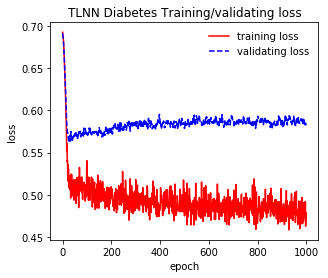

In [11]:
# Summarize history for loss.

plt.ion()

plt.figure('TLNN Diabetes loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Diabetes Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


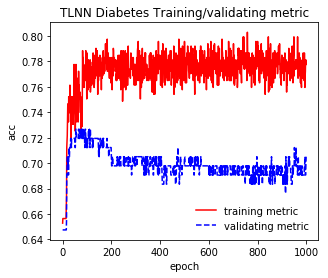

In [12]:
# Summarize history for metric.

plt.figure('TLNN Diabetes metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('TLNN Diabetes Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch') 
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
